# Filtering out Signals from outer space
**"B_sig_isSignalAcceptMissingNeutrino"** detects if the signal comes from inside or outside the colider

# Get Simulation data set for 3 different masses (5.0 MeV, 3.0 GeV, 4.6 GeV)

In [55]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_0_005  = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_0_005_GeV_10000_events_nobdtcut.root:tree_Bsig;1")
data_3      = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_3_GeV_10000_events_nobdtcut.root:tree_Bsig;1")
data_4_6    = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_4_6_GeV_10000_events_nobdtcut.root:tree_Bsig;1")

## Defining the Function to use
- convert from **akward.highlevel.Array** to pandas DF set and replace "nan"-values
- plot histogram and save it


In [56]:


def convert_to_DF(data):
    x = []
    for data_set in data:
        x.append(data_set.array(library="np"))
    
    col_name = []
    for name in data.typenames():
        col_name.append(name)

    return pd.DataFrame(np.transpose(x), columns=col_name)


def drop_null(data):
    data.replace("nan", 1)
    for index, value in enumerate(data["B_sig_isSignalAcceptMissingNeutrino"]):
        if value == 0:
            data.drop(index, inplace=True)
    


def plot_hist(data1, data2, data3, index, path):
    plt.figure(figsize=(12,7))
    x,b,y=plt.hist(data1[index], density = True, histtype="step", label="0.005 GeV", bins = 200)
    plt.hist(data2[index], density = True, histtype="step", label="3.0 GeV", bins = b)
    plt.hist(data3[index], density = True, histtype="step", label="4.6 GeV", bins = b)
    plt.ylabel("Entries per ({:.3f} unit)".format(b[1]-b[0]))
    plt.xlabel(index)
    plt.xlim(min(b),max(b))
    plt.legend()
    








In [57]:

#create DF for neutrino filtering
filter_0_005 = convert_to_DF(data_0_005)
filter_3_0     = convert_to_DF(data_3)
filter_4_6   = convert_to_DF(data_4_6)


#drop B_sig_isSignalAcceptMissingNeutrino = 0 and replace "nan" --> 1
drop_null(filter_0_005),                 drop_null(filter_3_0),                   drop_null(filter_4_6)
filter_0_005.fillna(1, inplace= True),   filter_3_0.fillna(1, inplace= True),     filter_4_6.fillna(1, inplace= True)




(None, None, None)

<ipython-input-56-93ca8d0e066a>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,7))


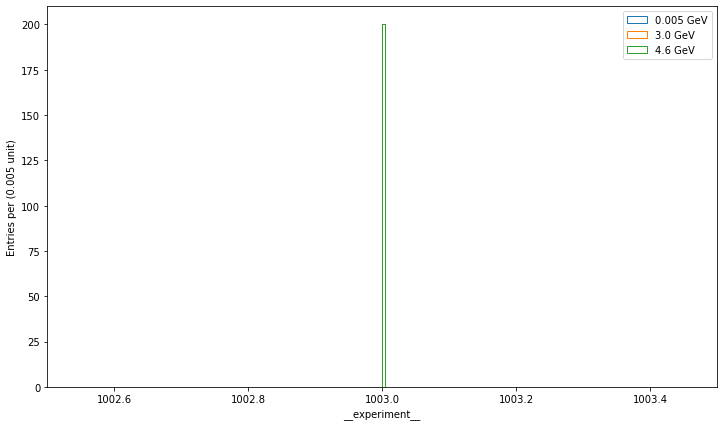

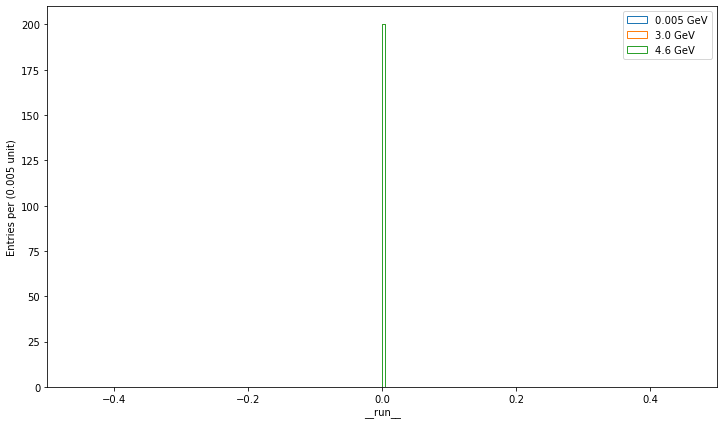

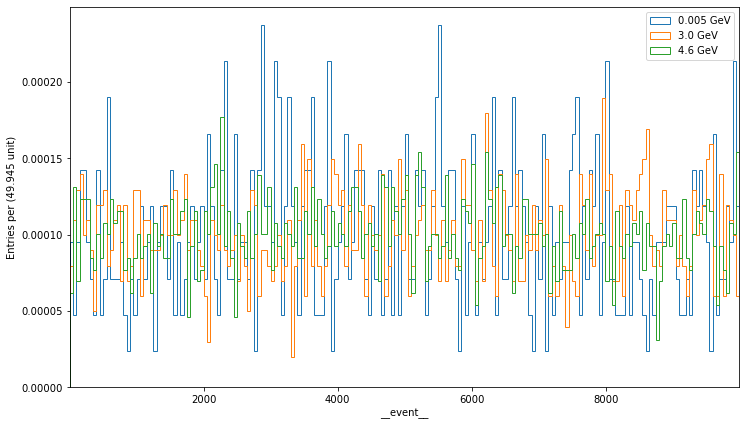

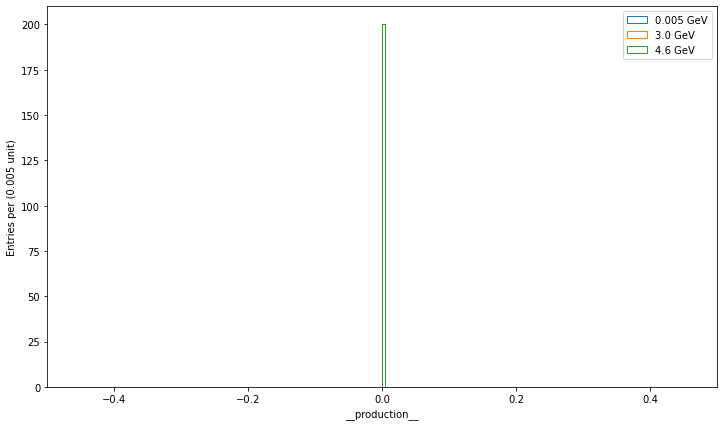

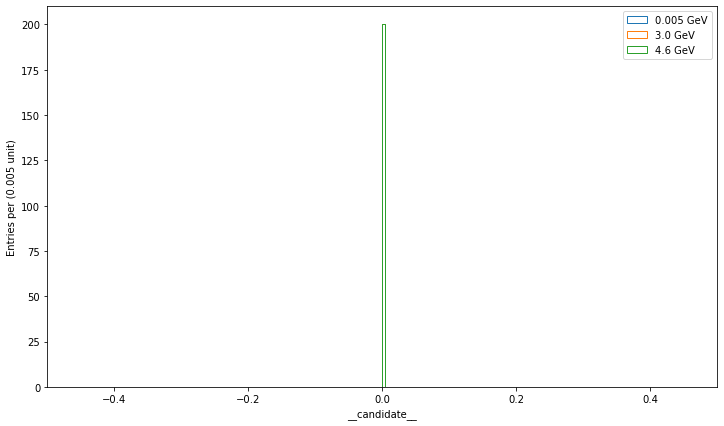

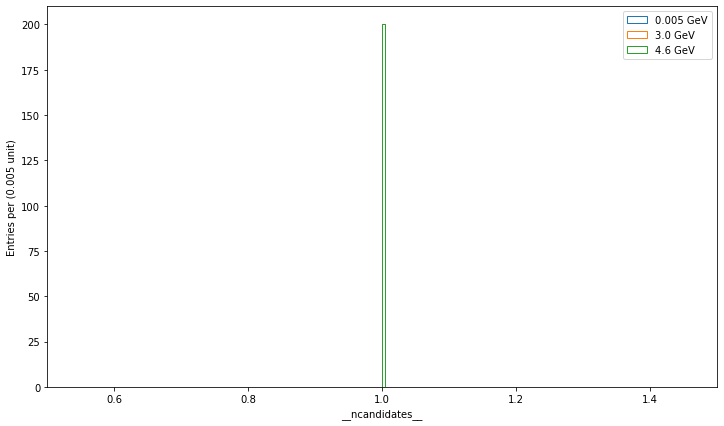

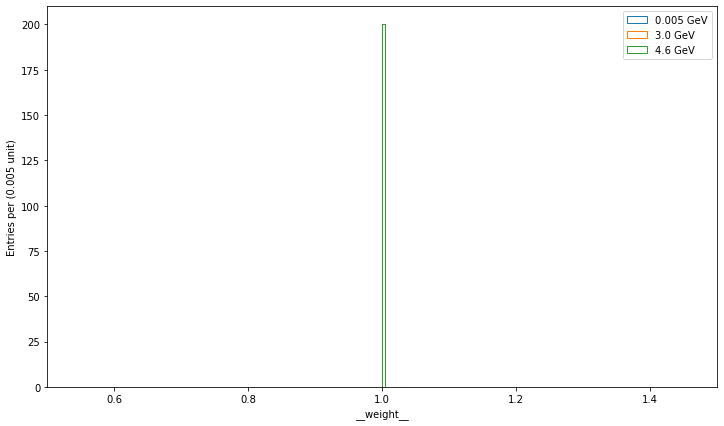

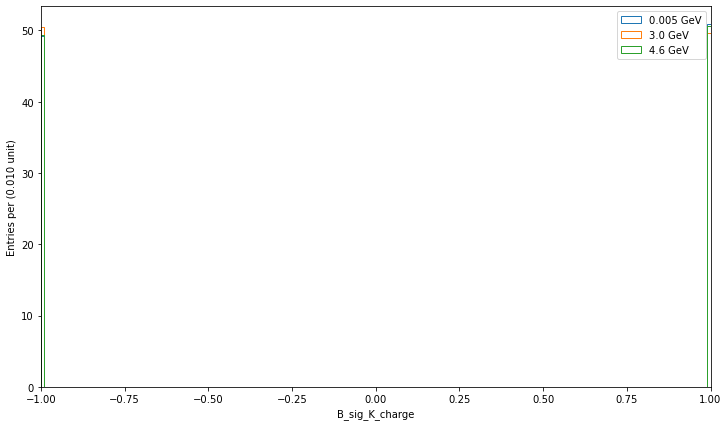

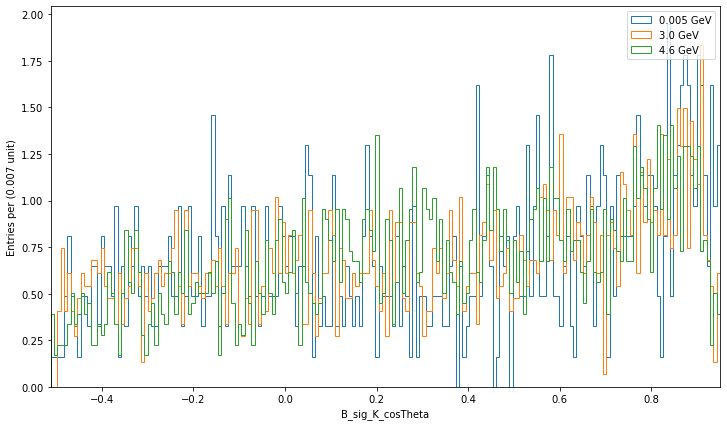

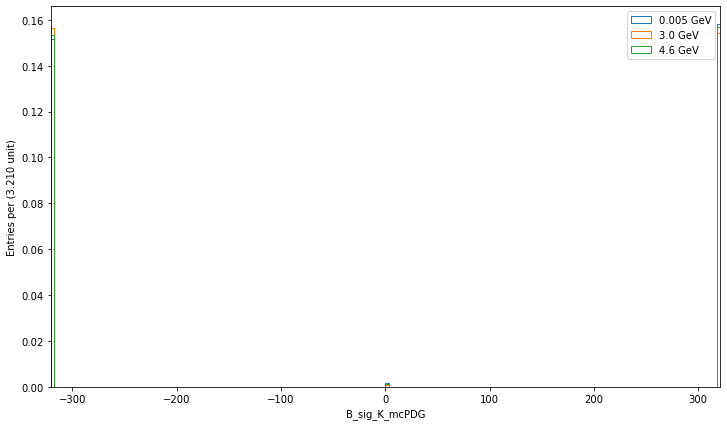

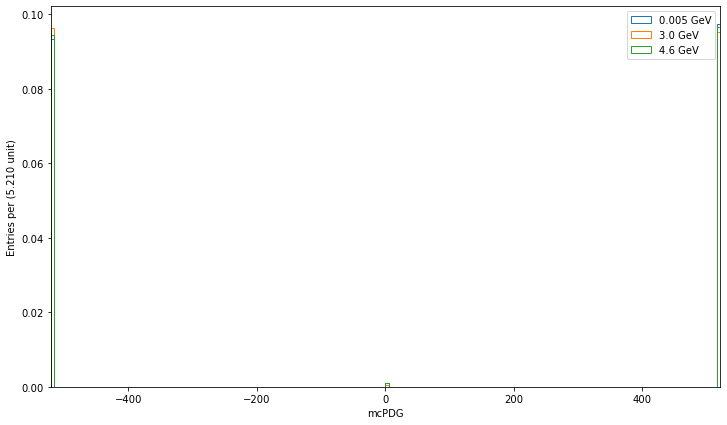

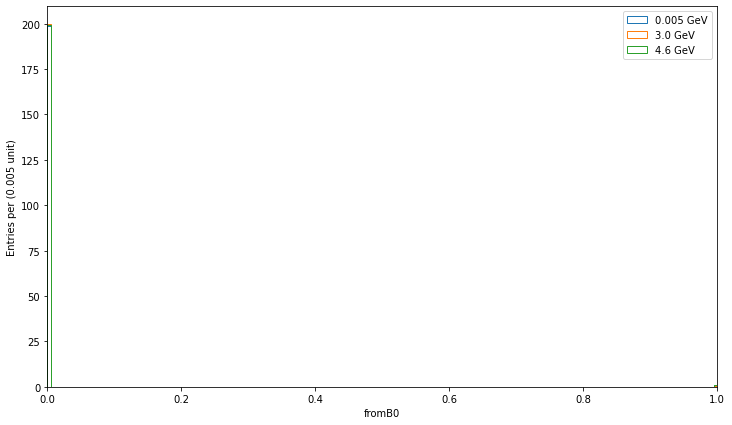

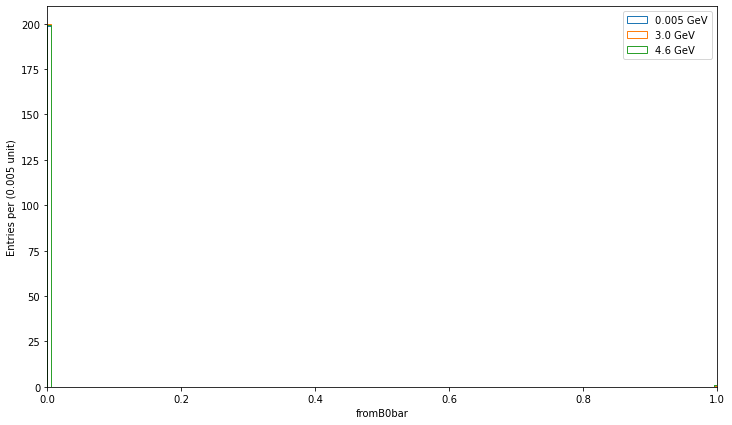

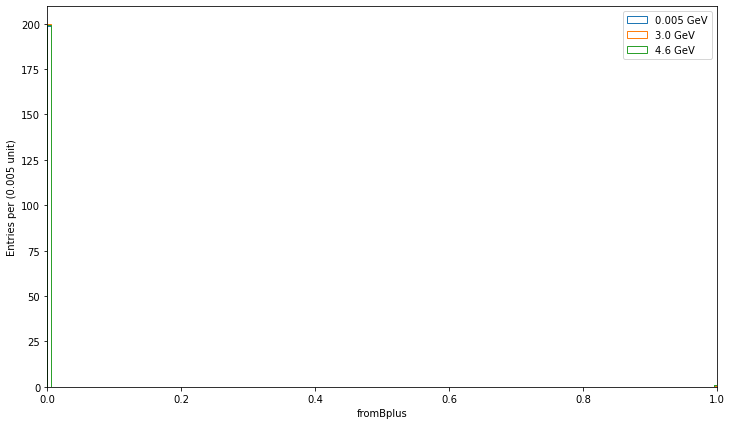

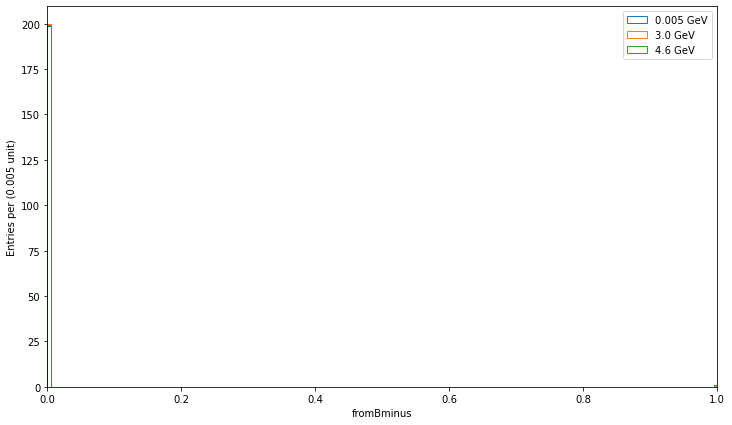

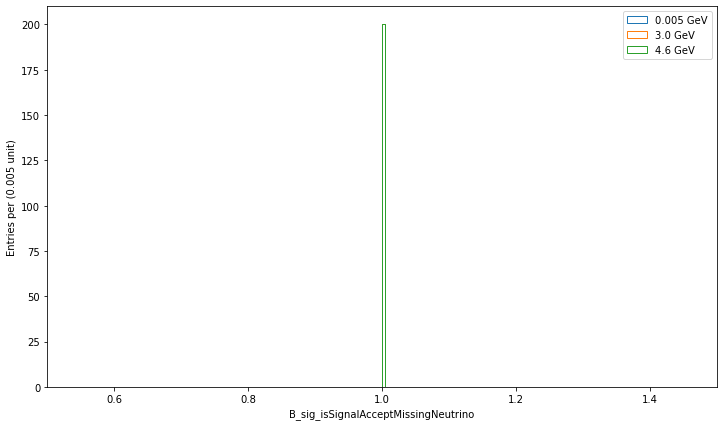

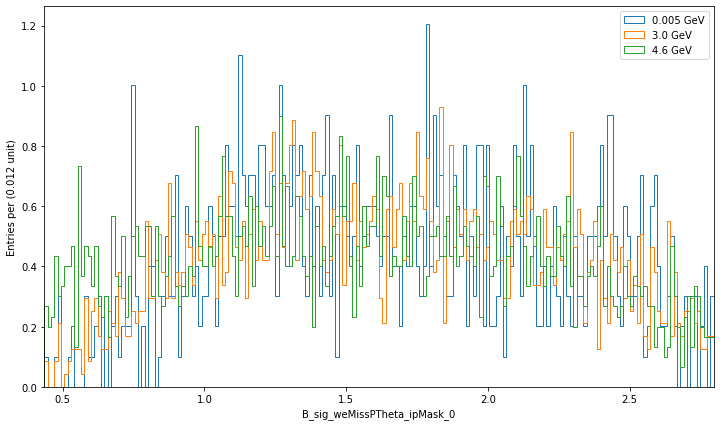

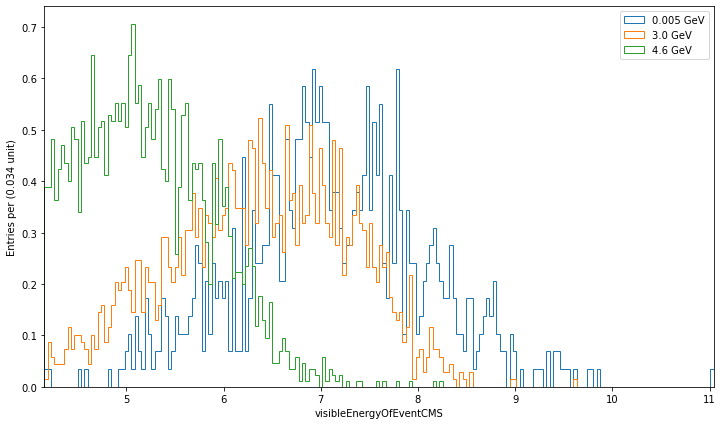

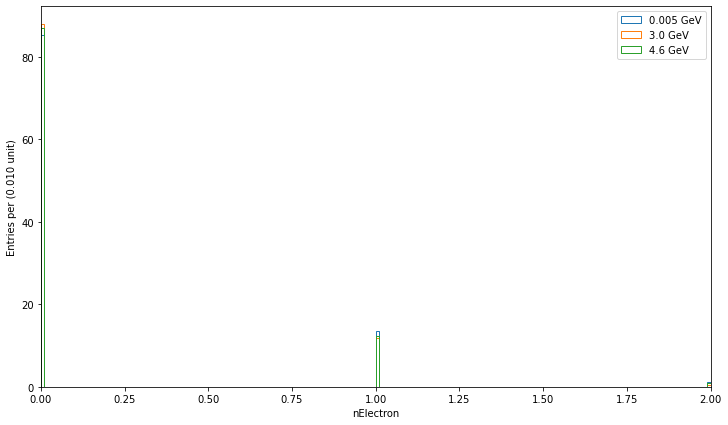

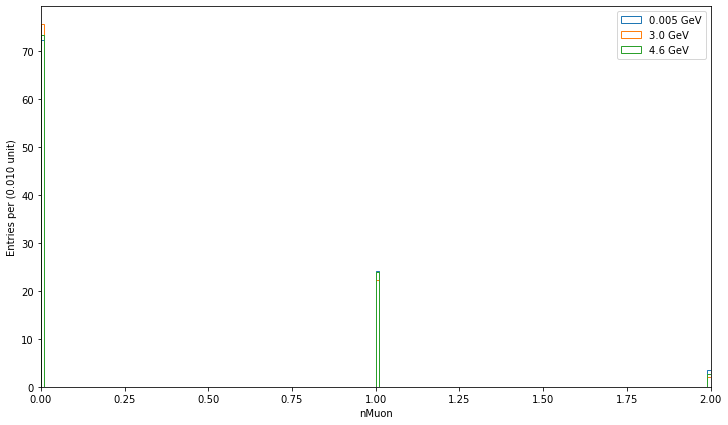

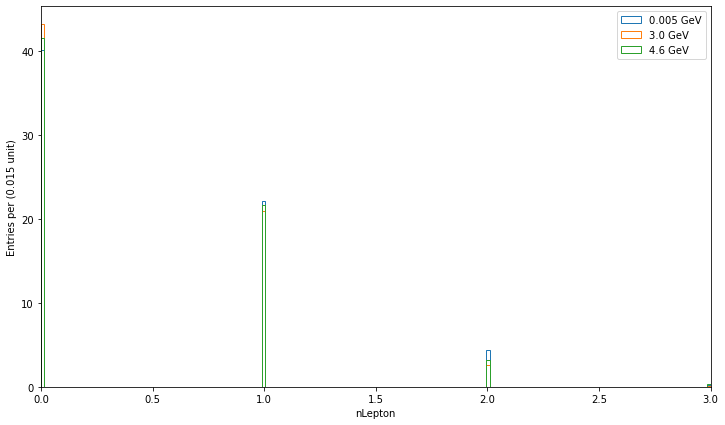

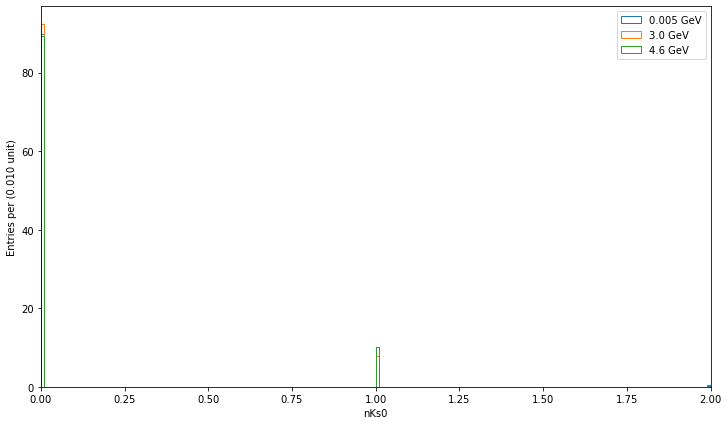

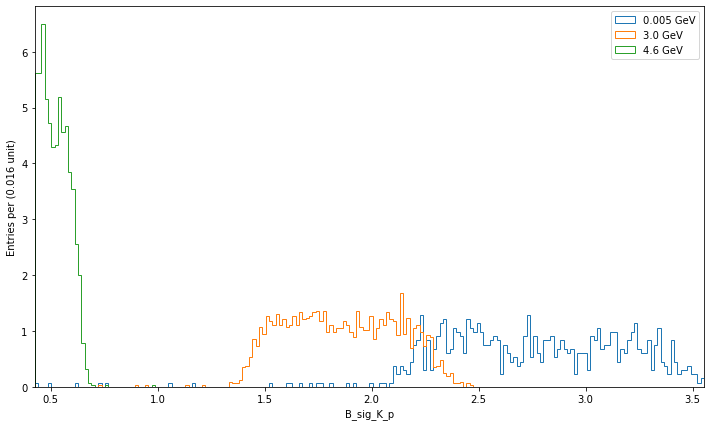

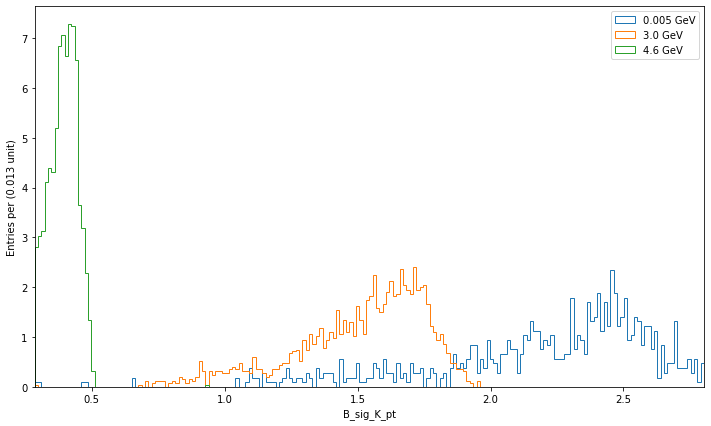

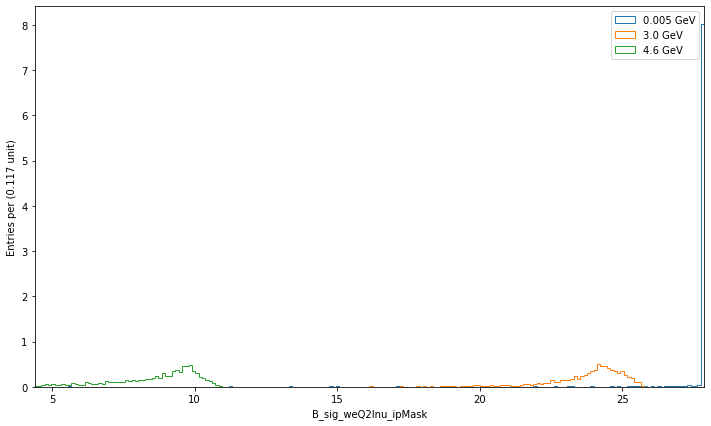

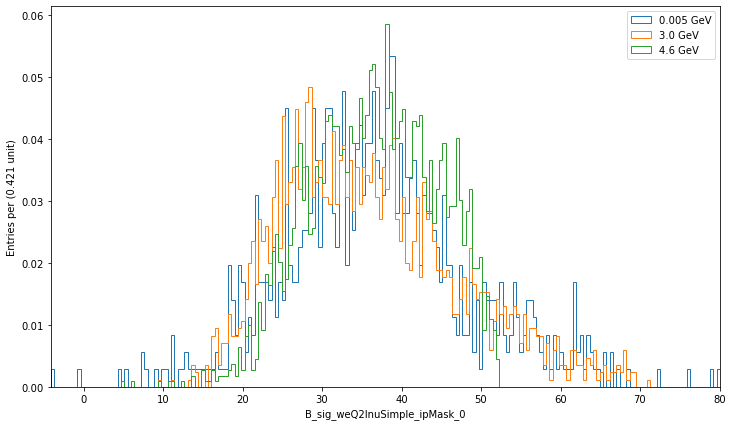

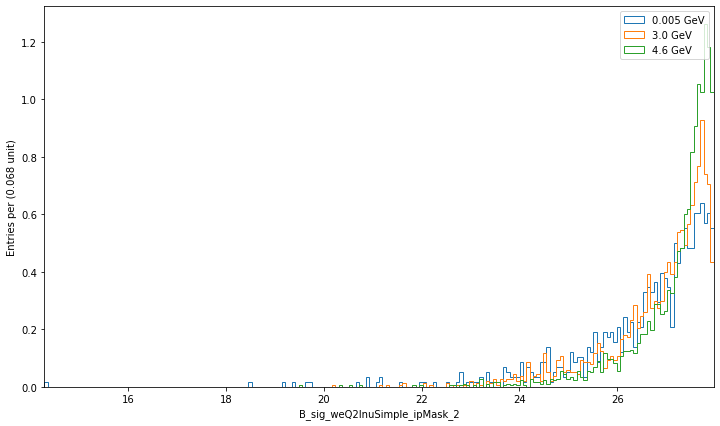

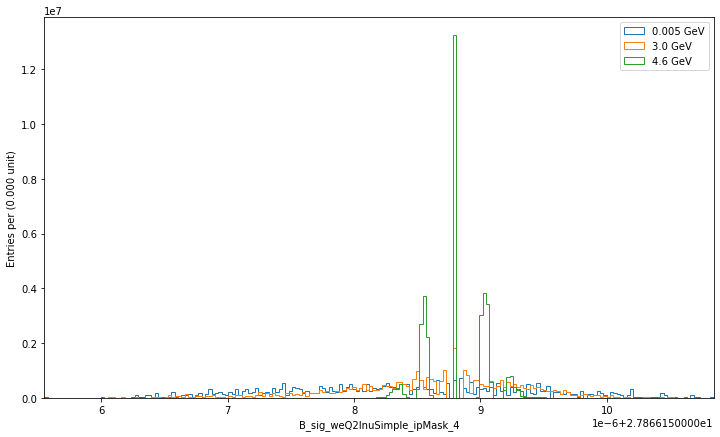

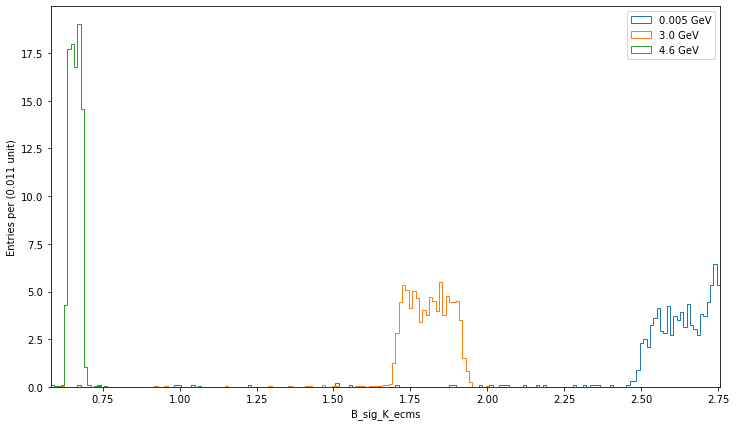

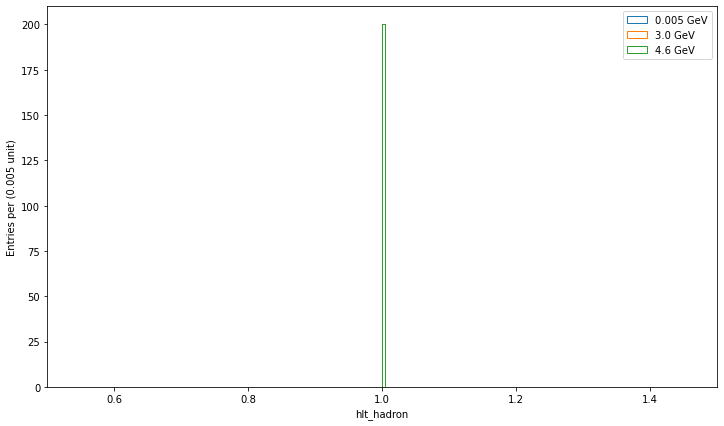

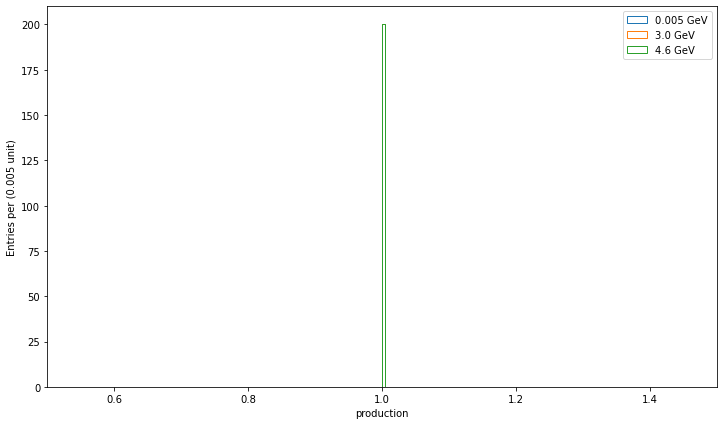

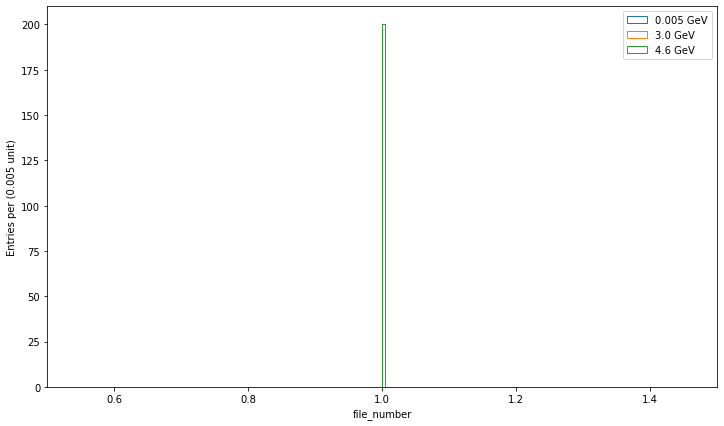

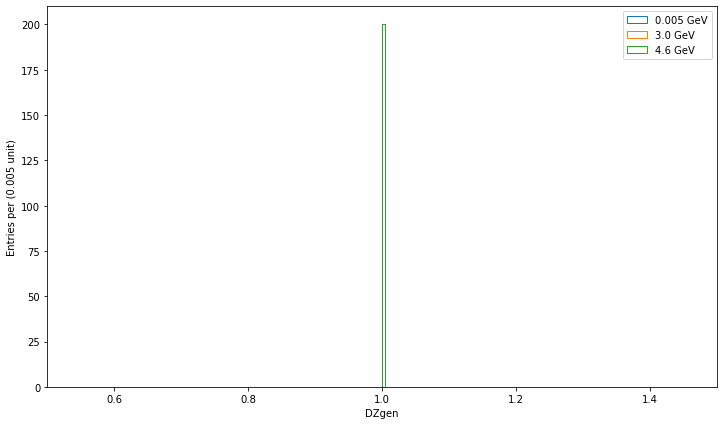

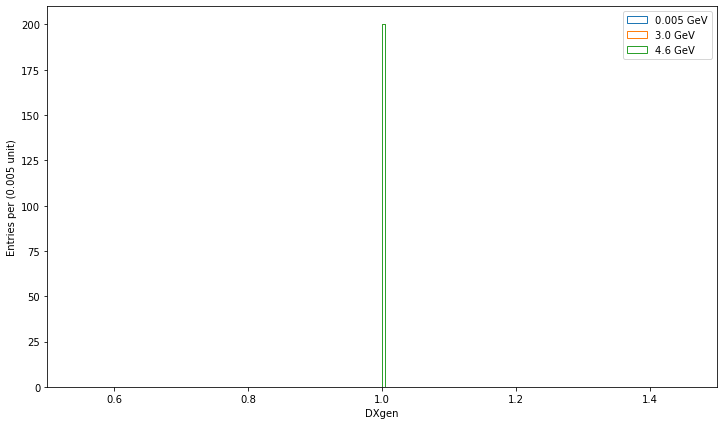

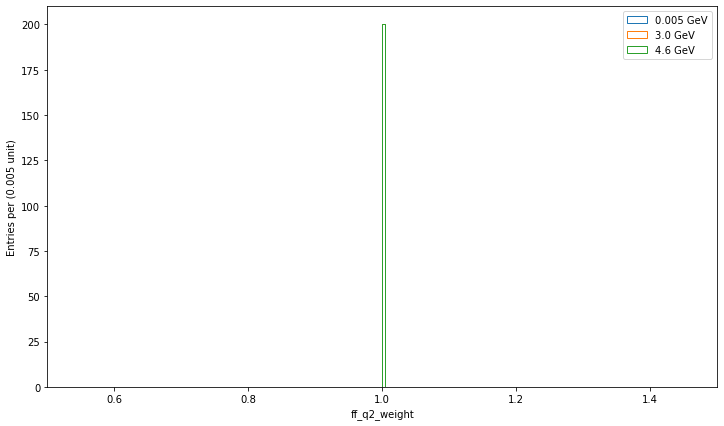

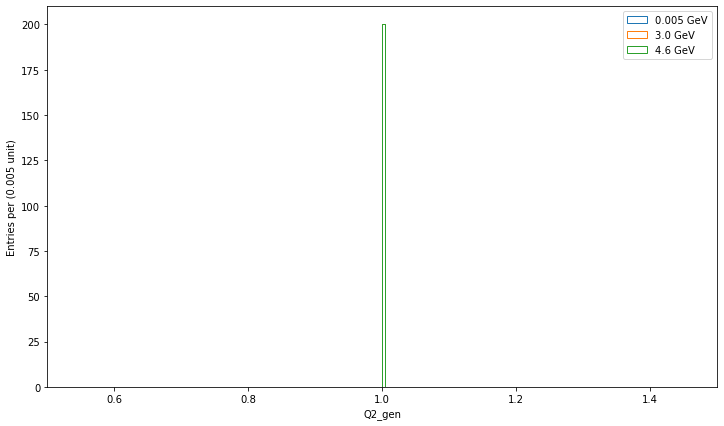

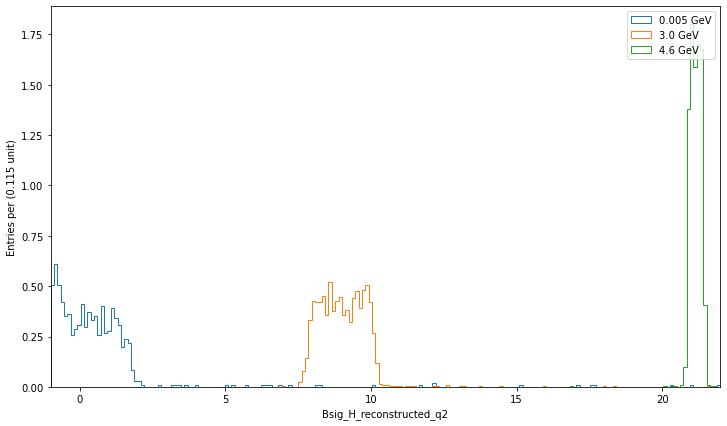

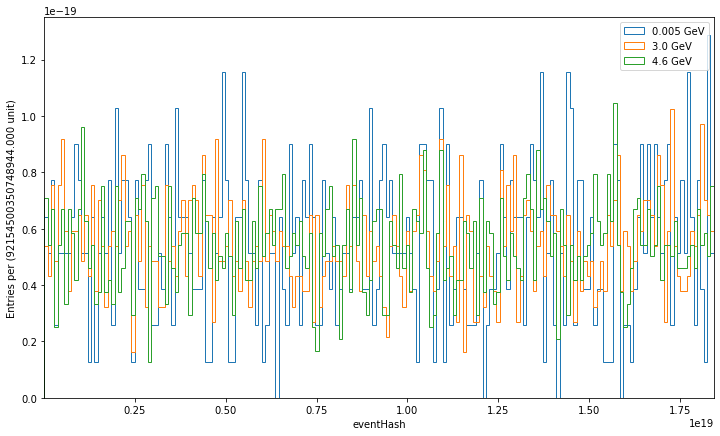

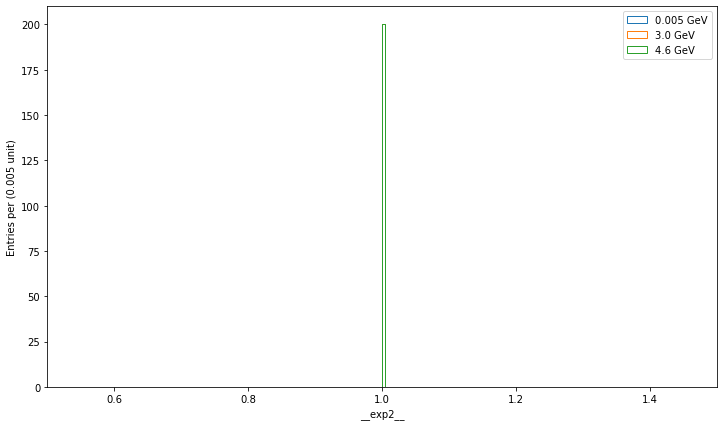

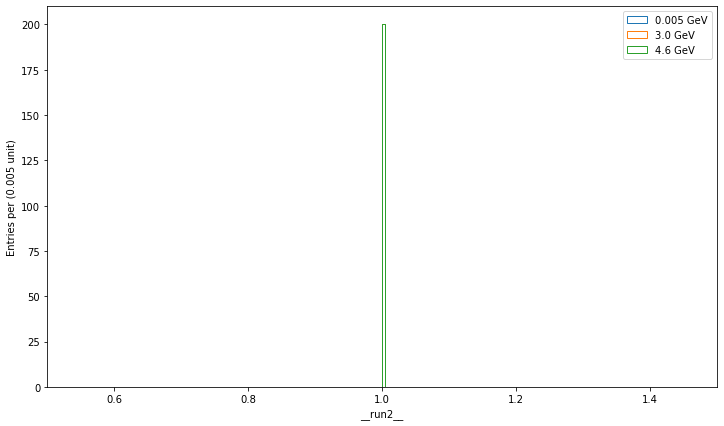

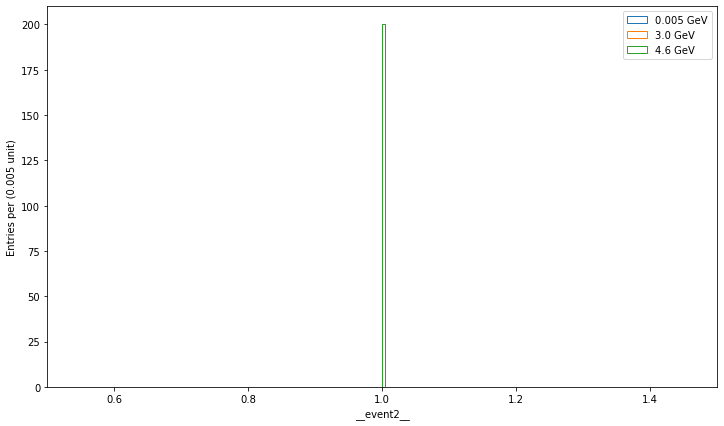

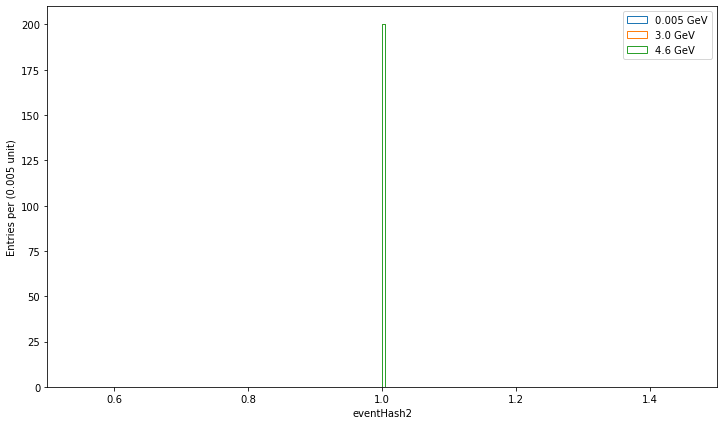

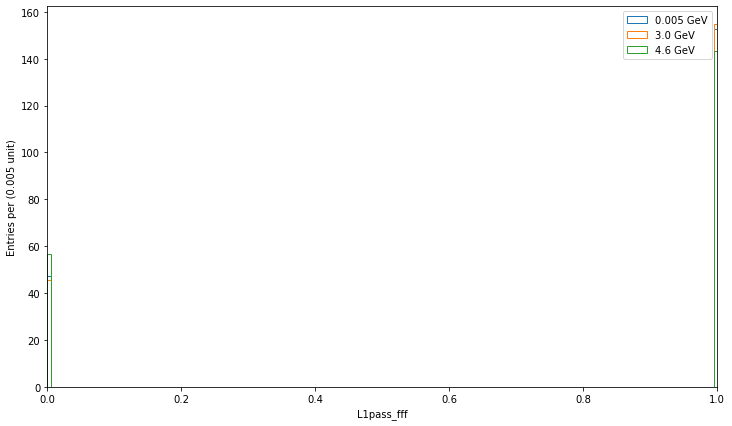

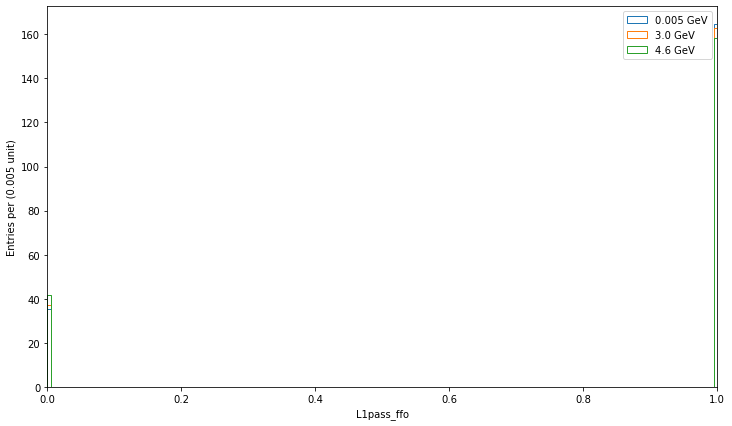

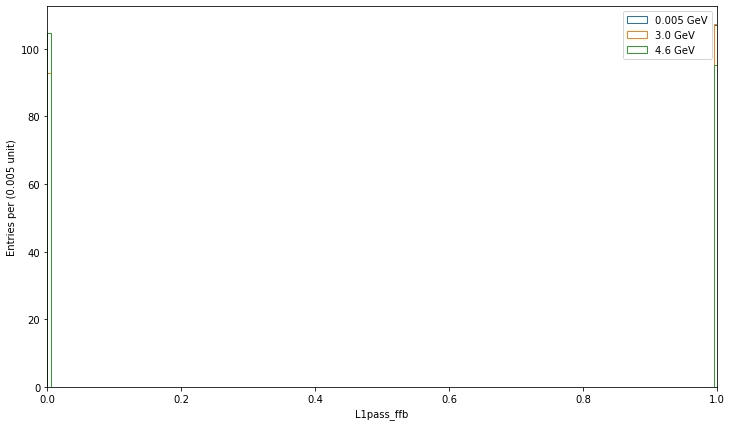

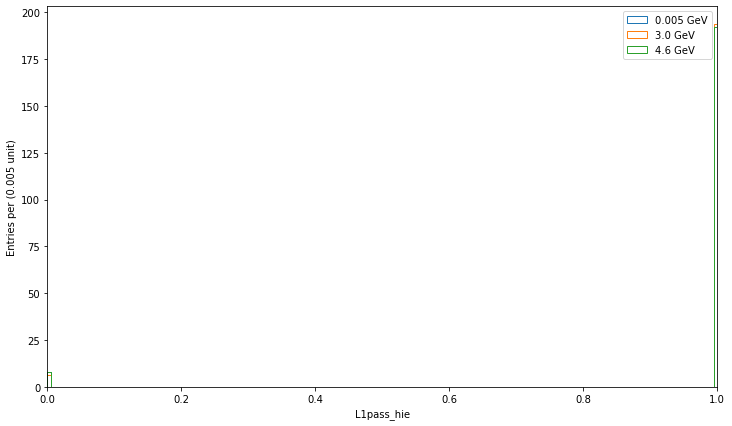

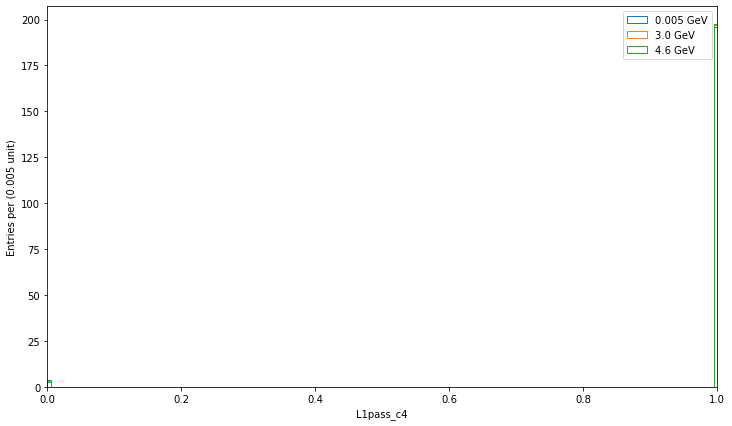

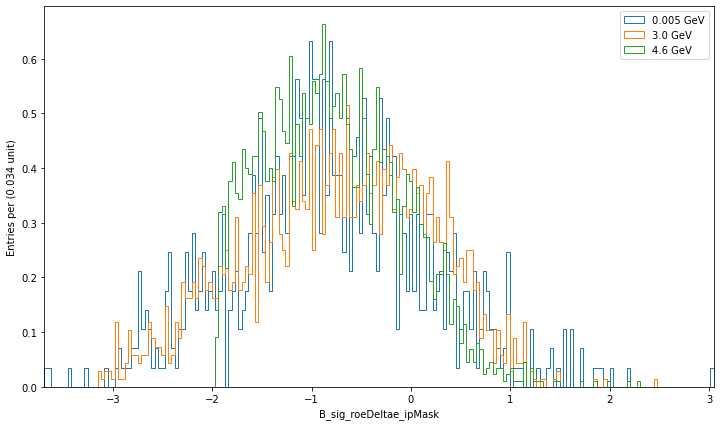

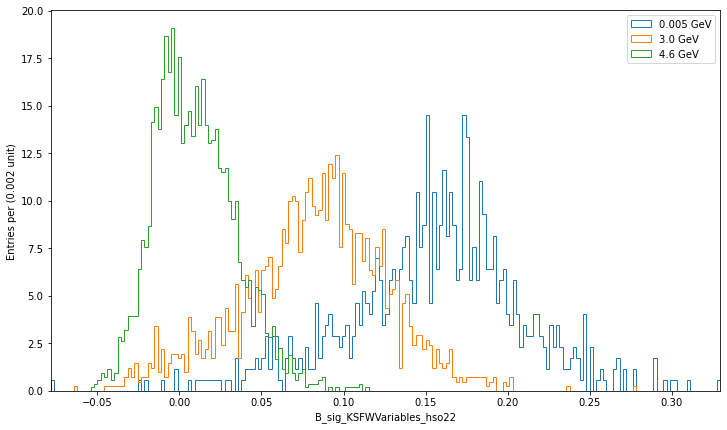

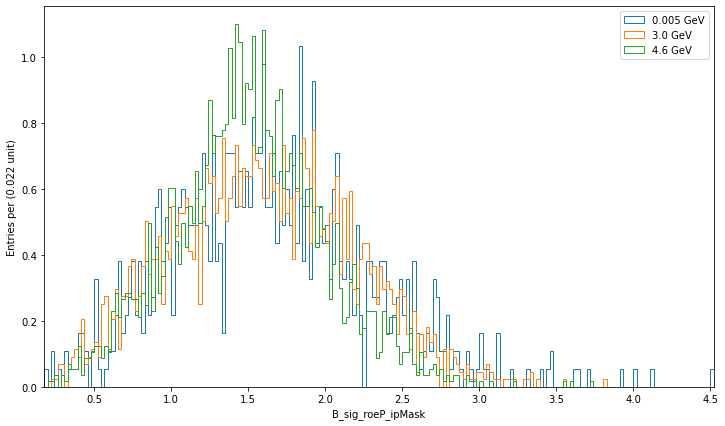

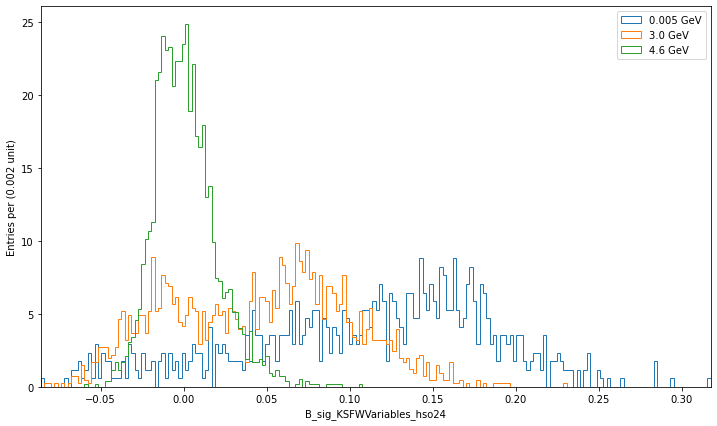

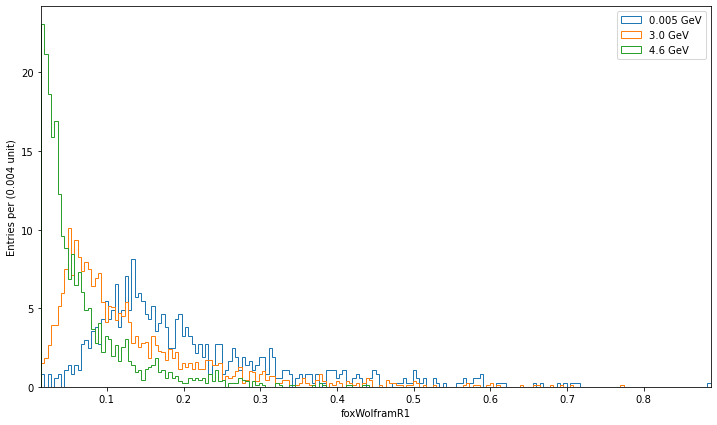

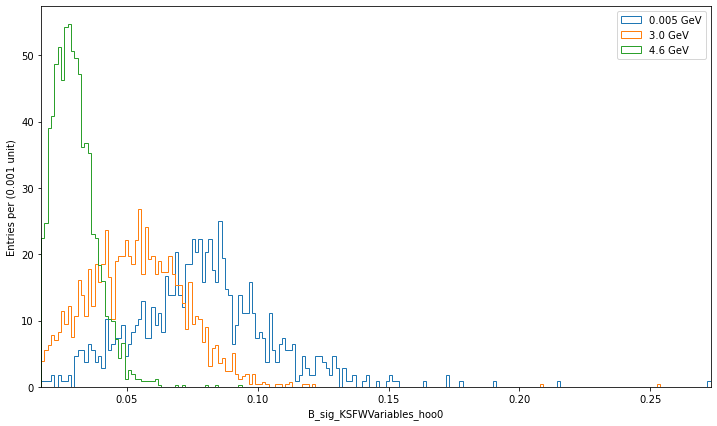

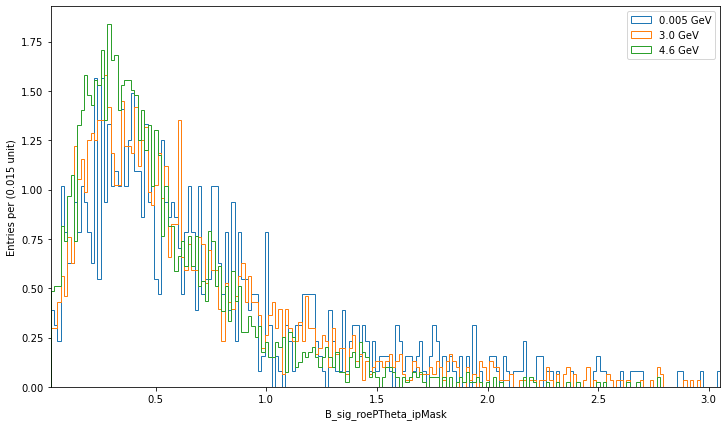

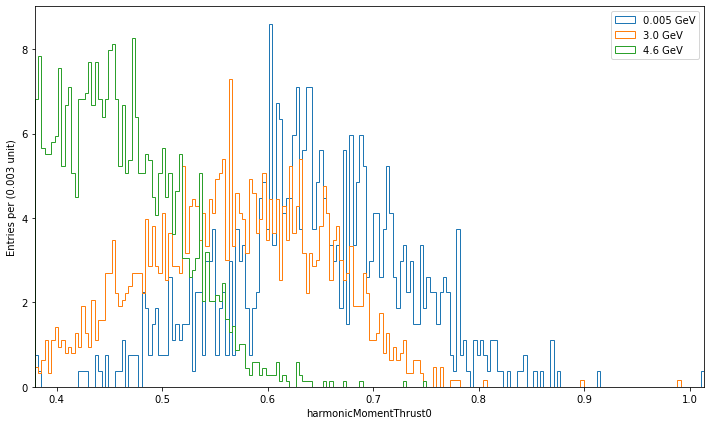

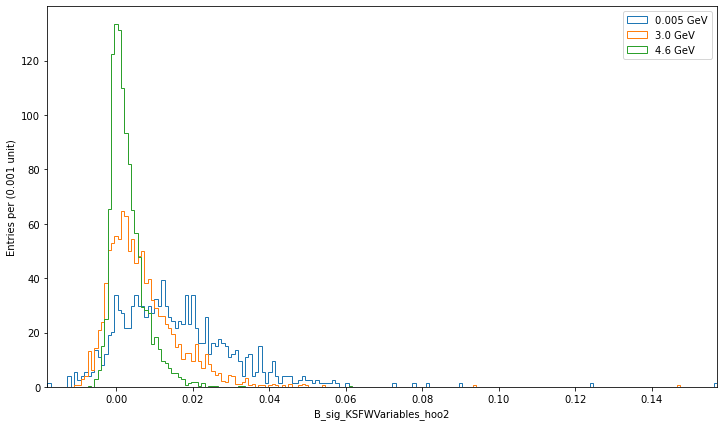

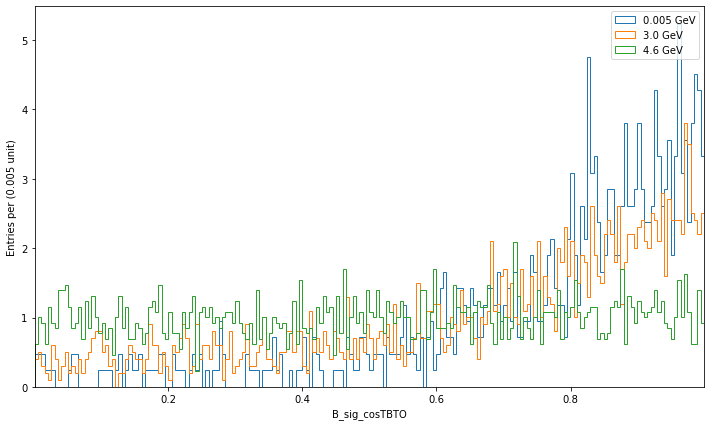

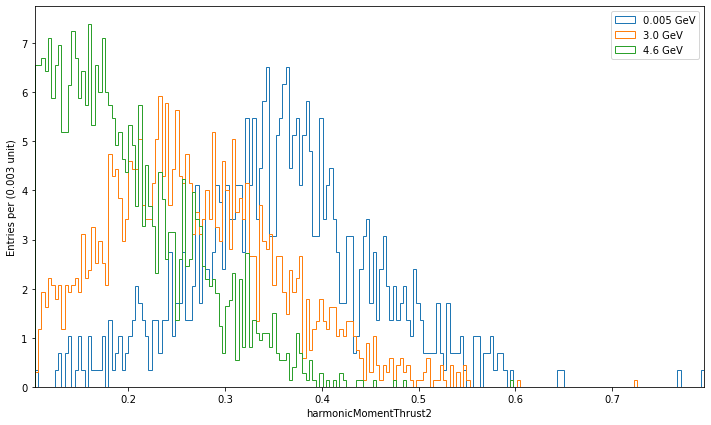

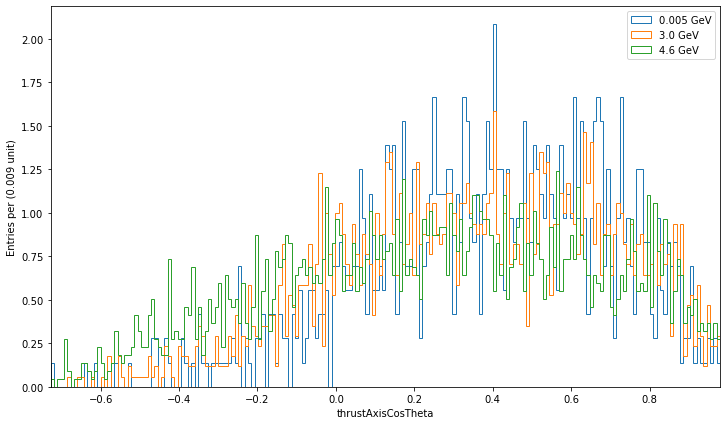

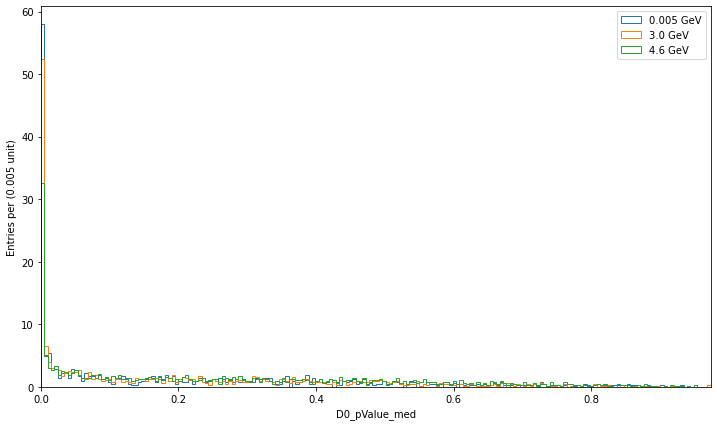

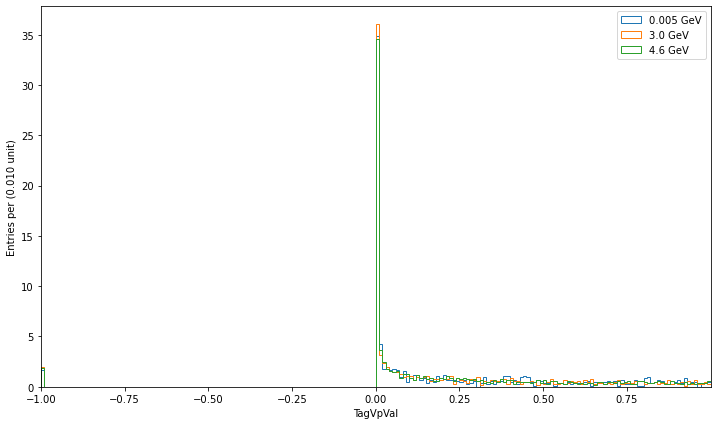

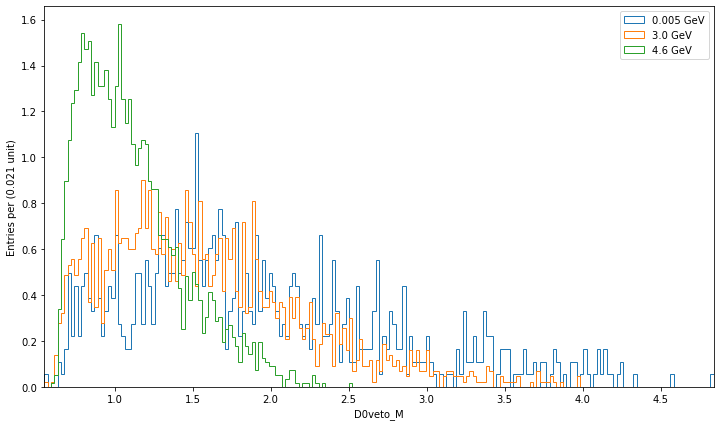

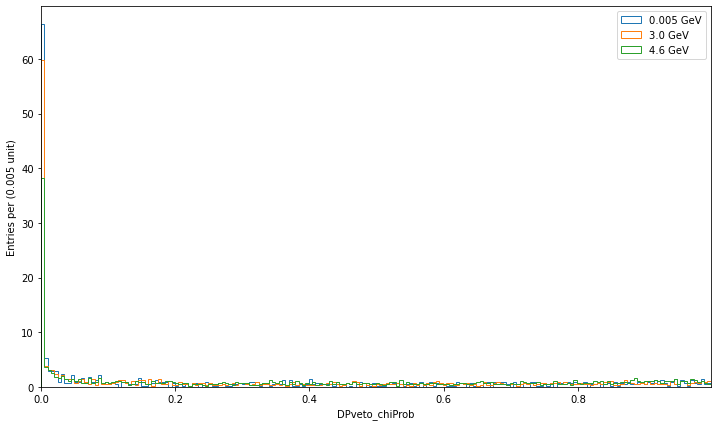

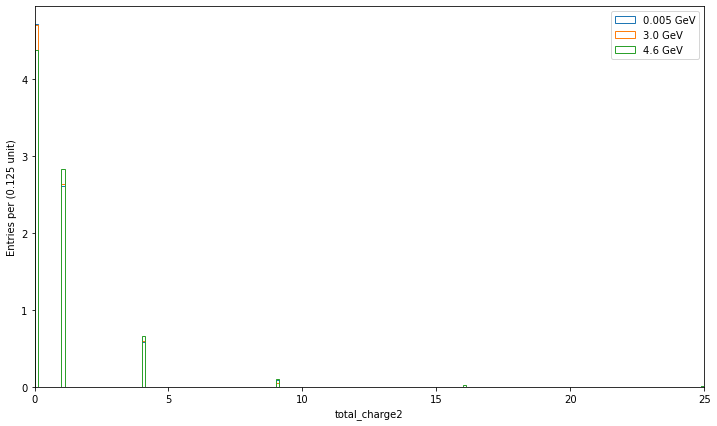

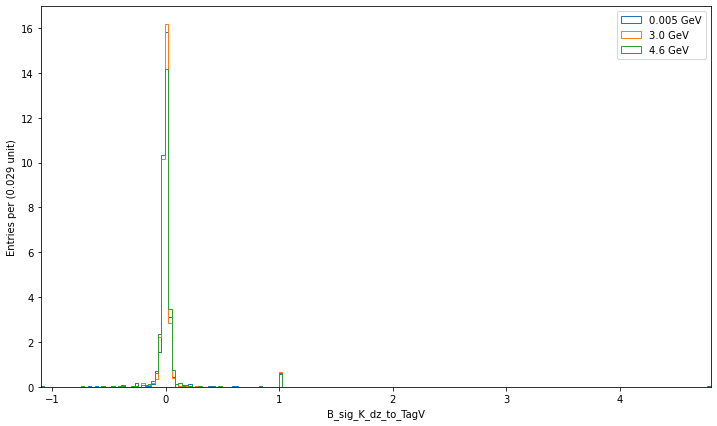

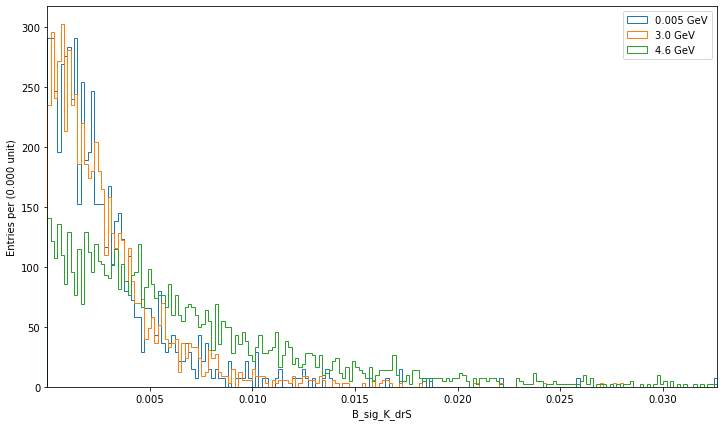

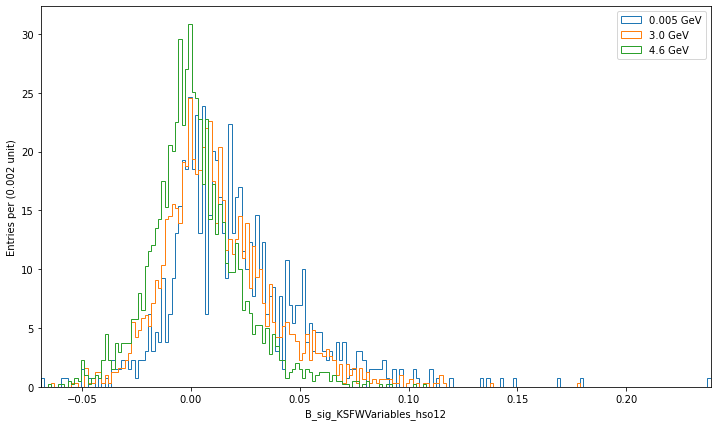

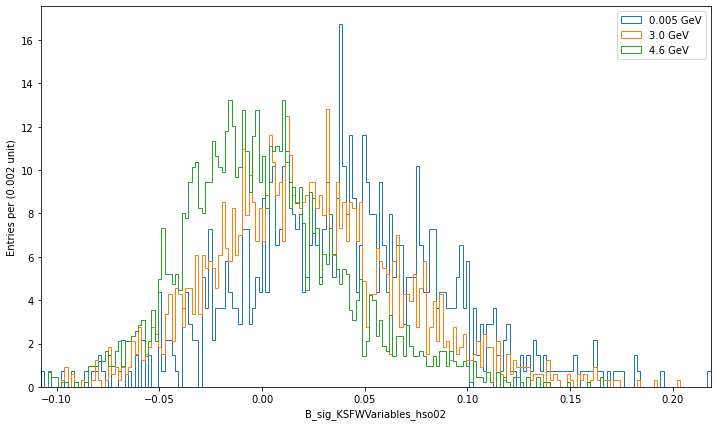

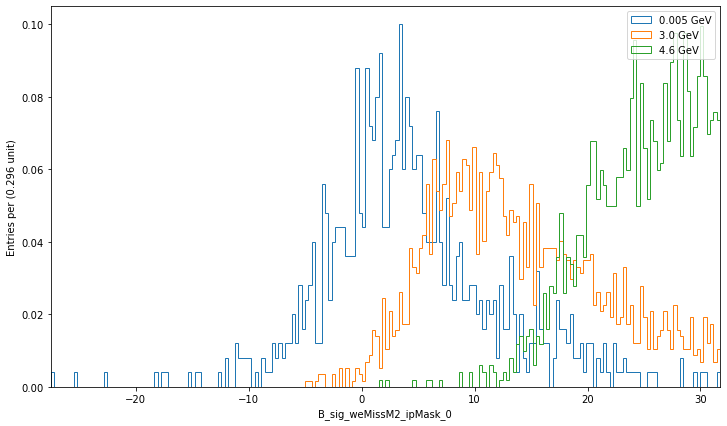

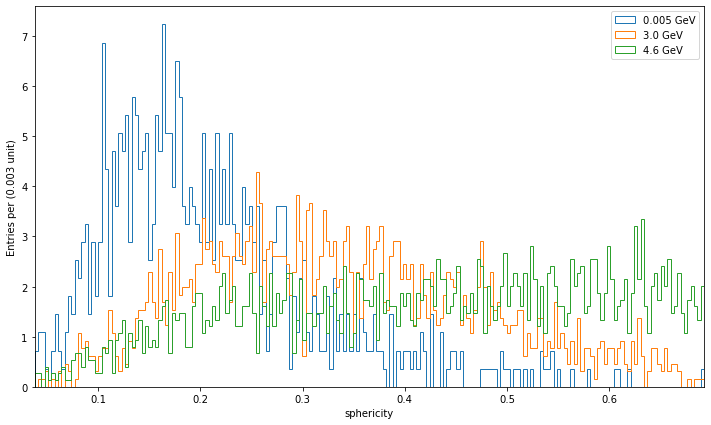

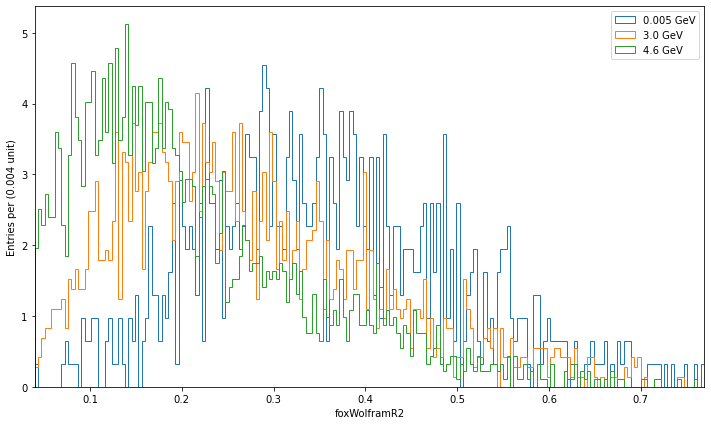

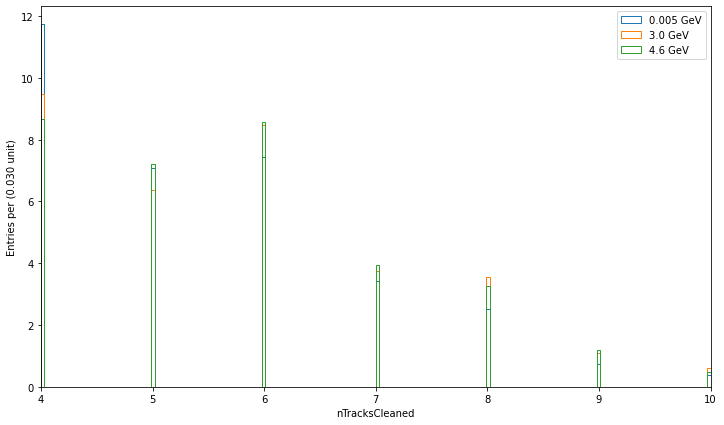

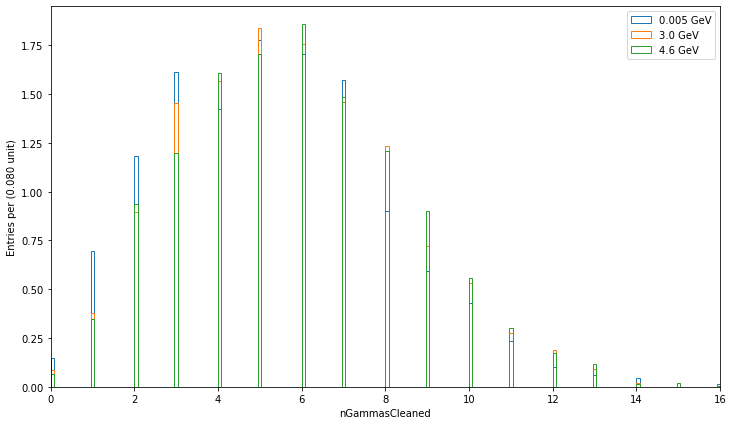

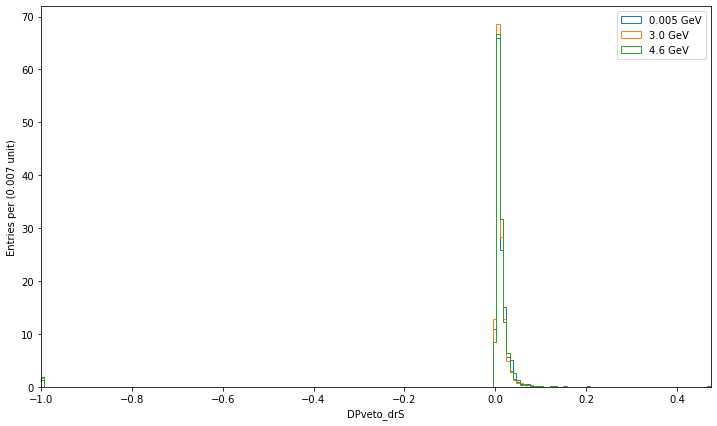

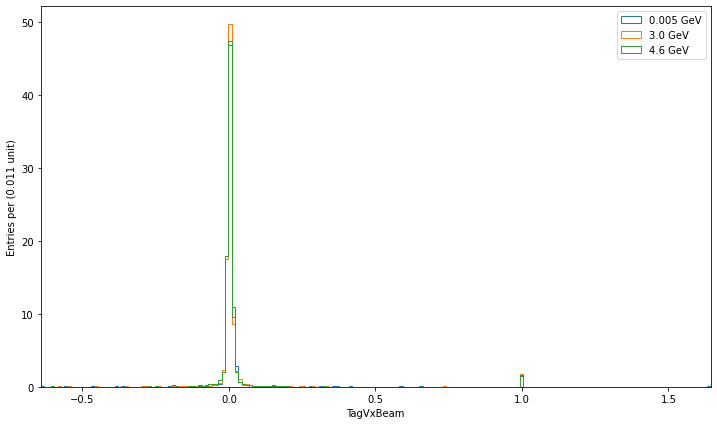

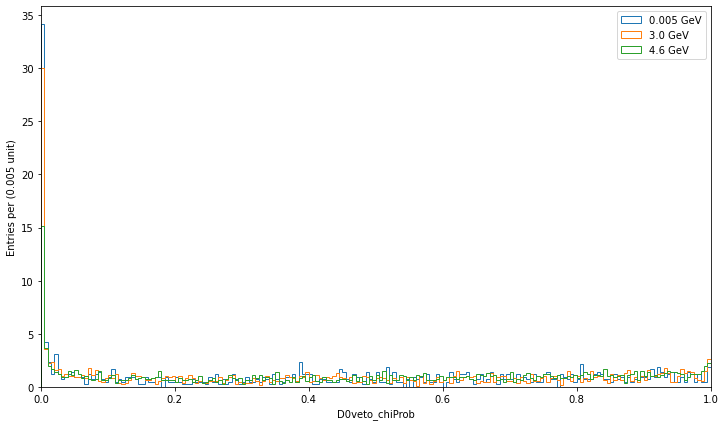

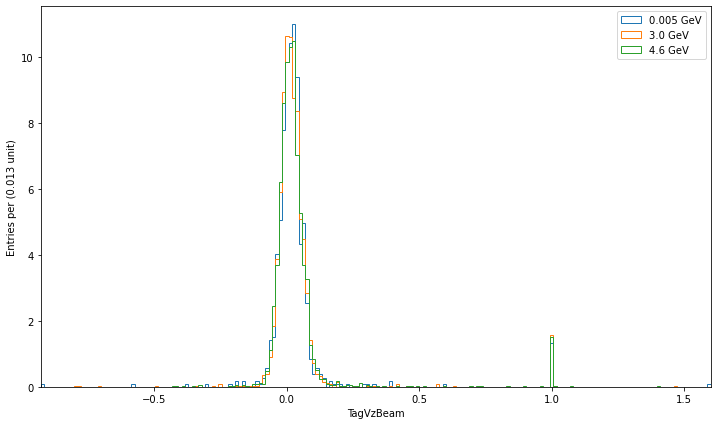

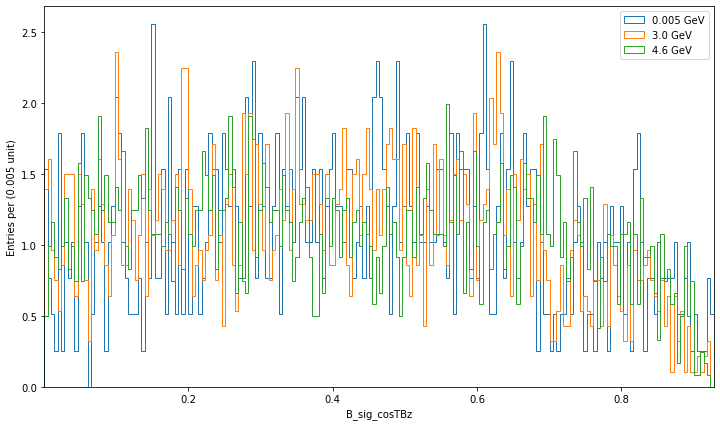

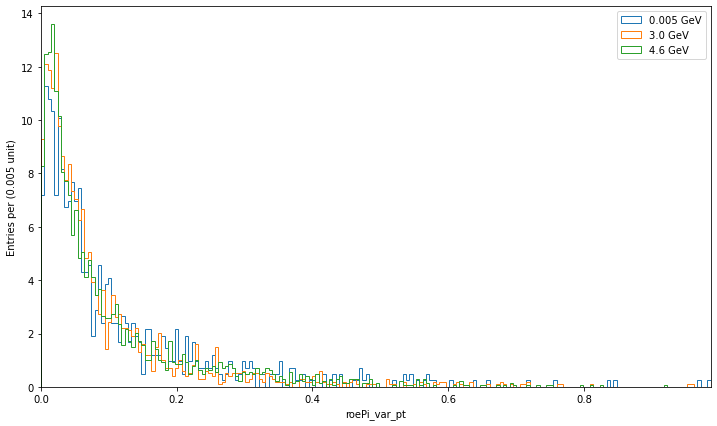

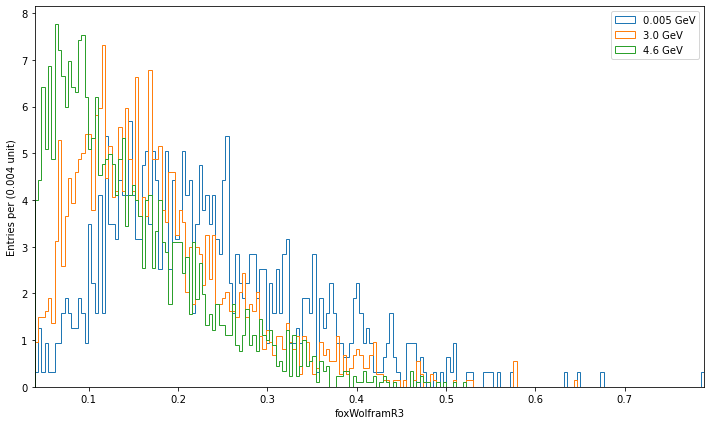

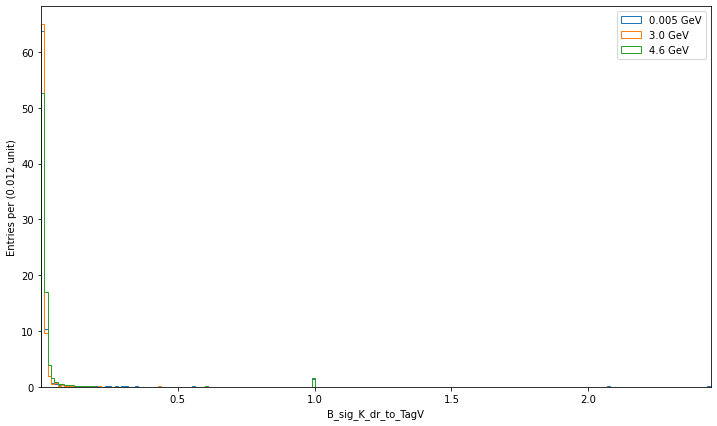

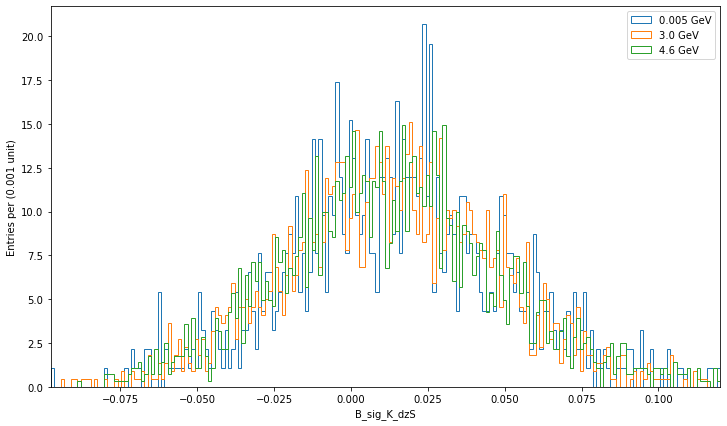

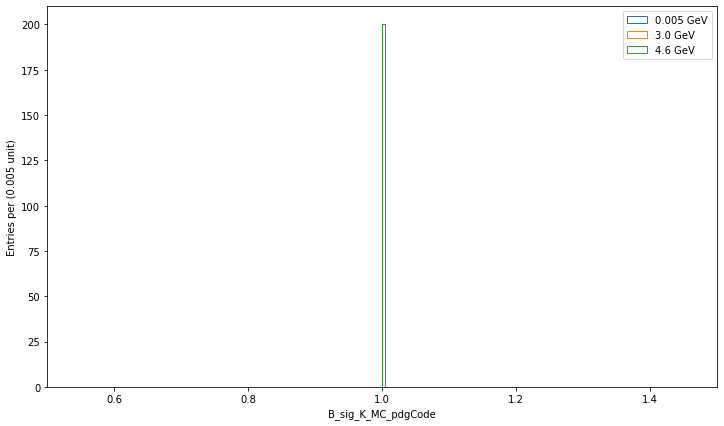

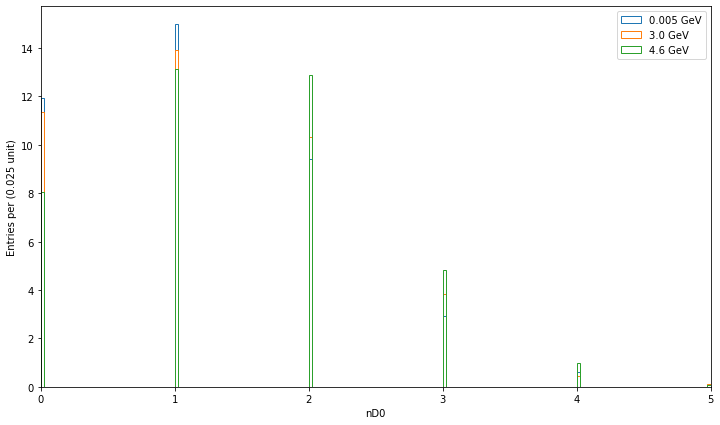

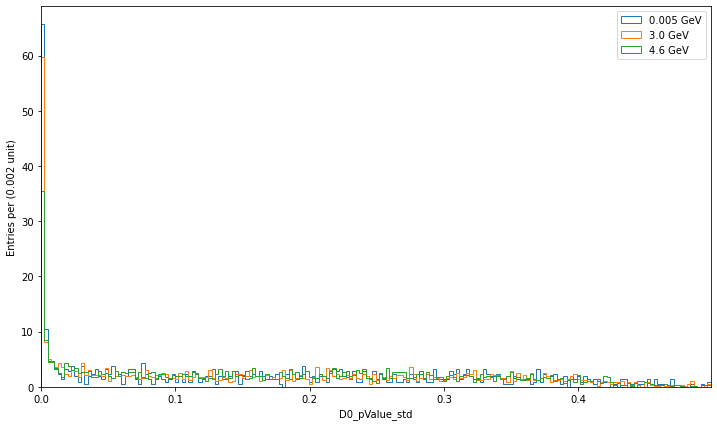

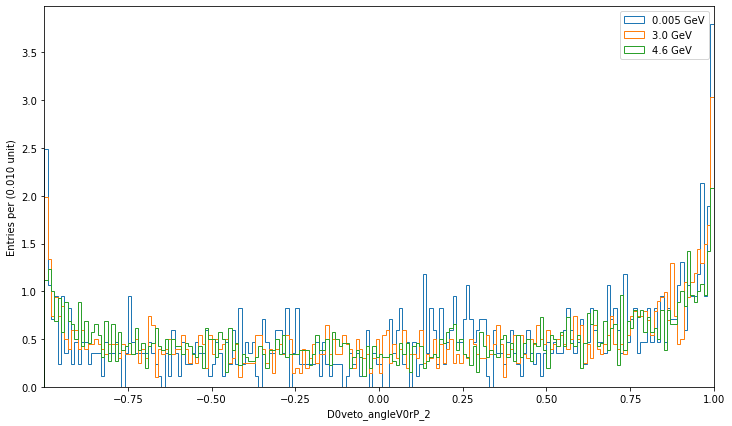

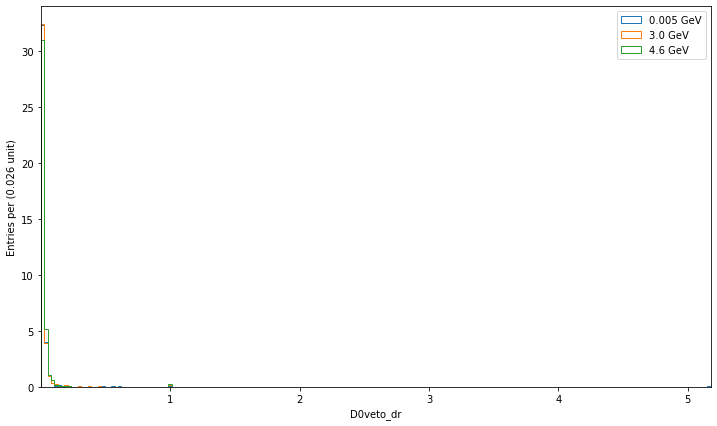

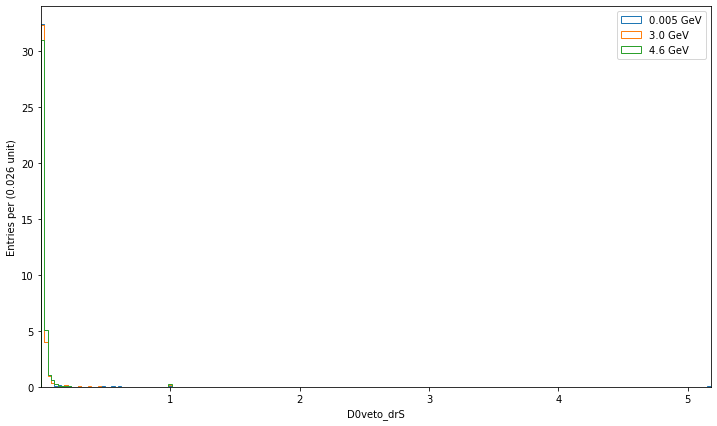

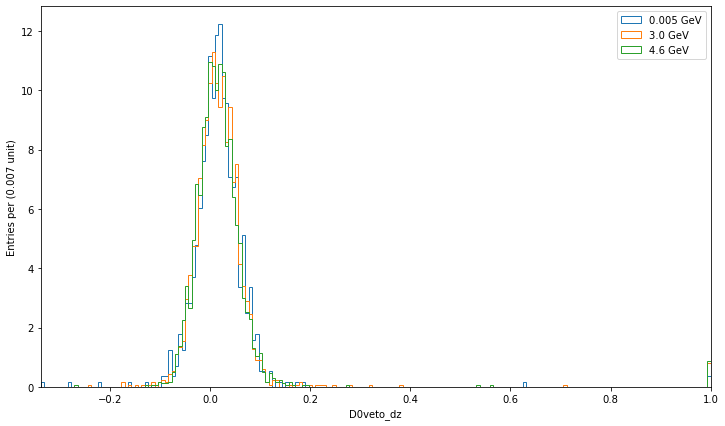

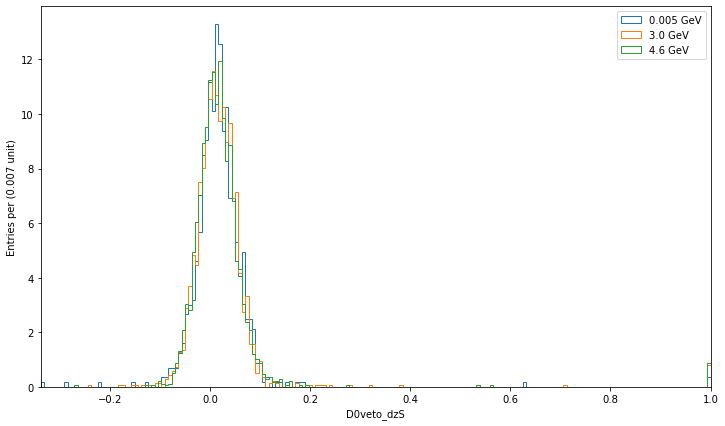

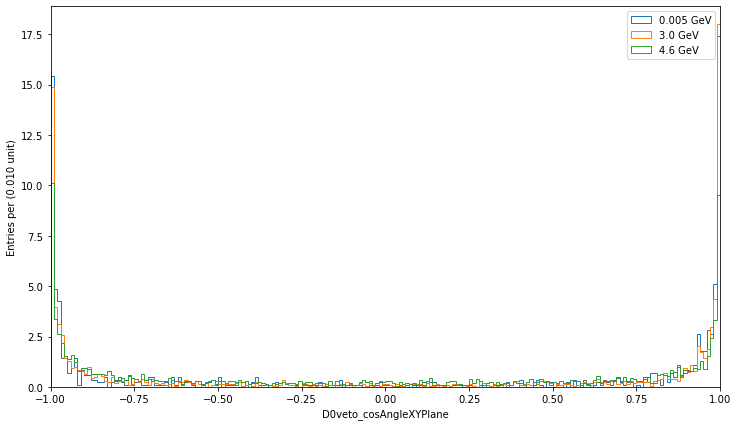

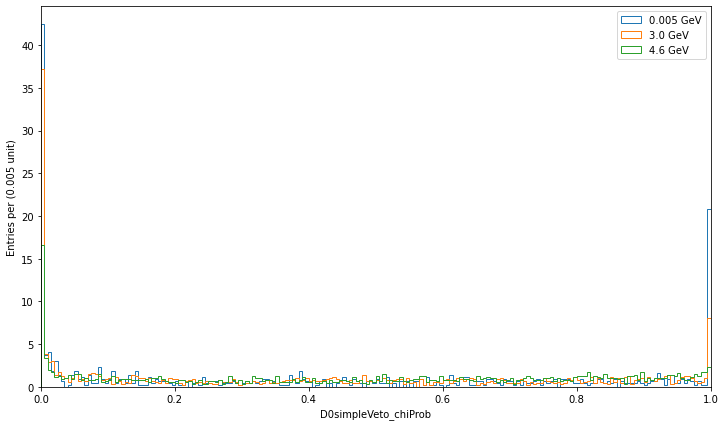

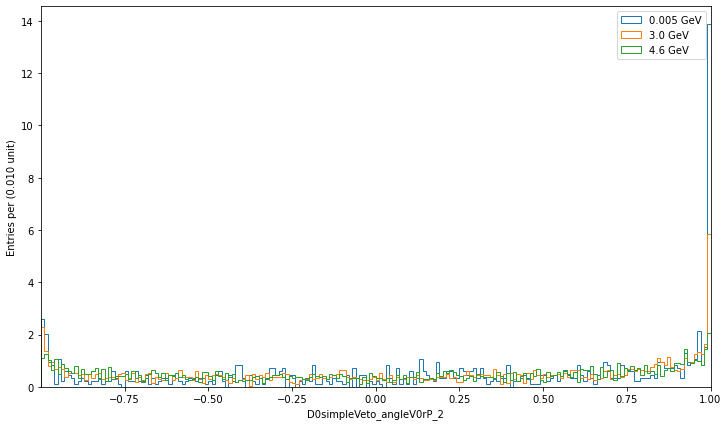

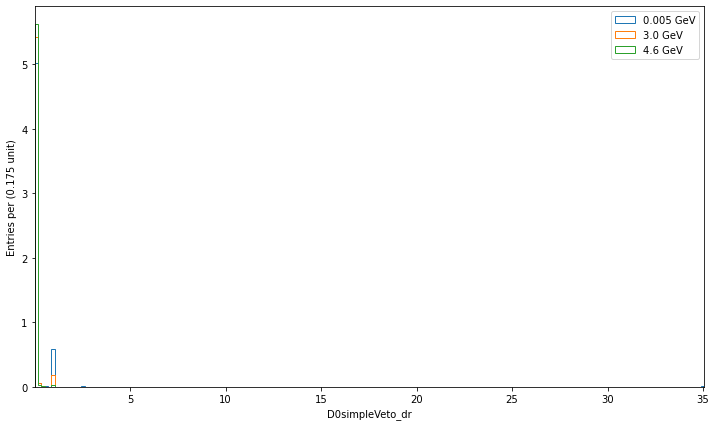

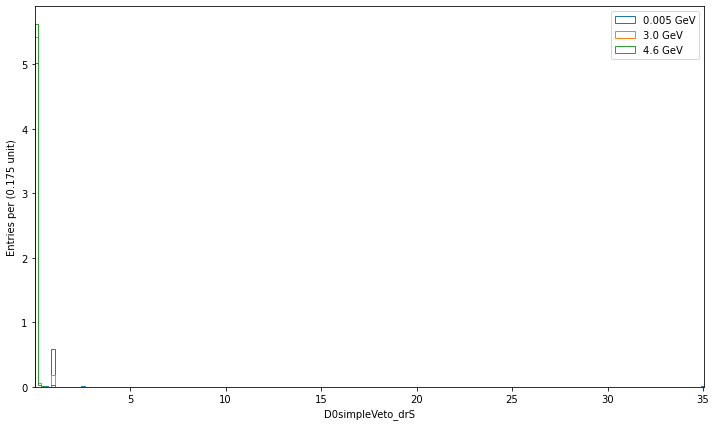

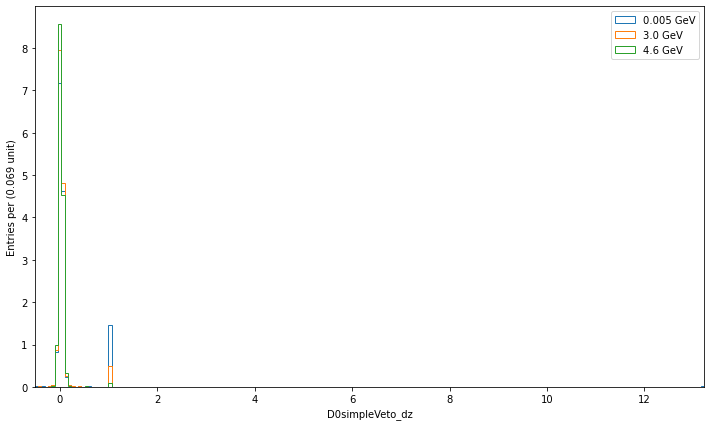

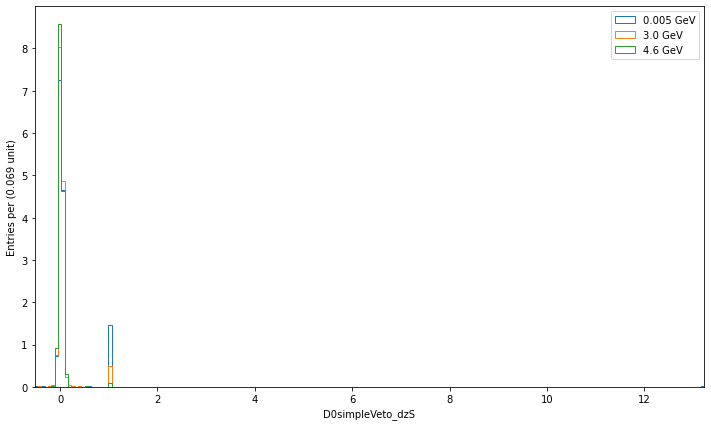

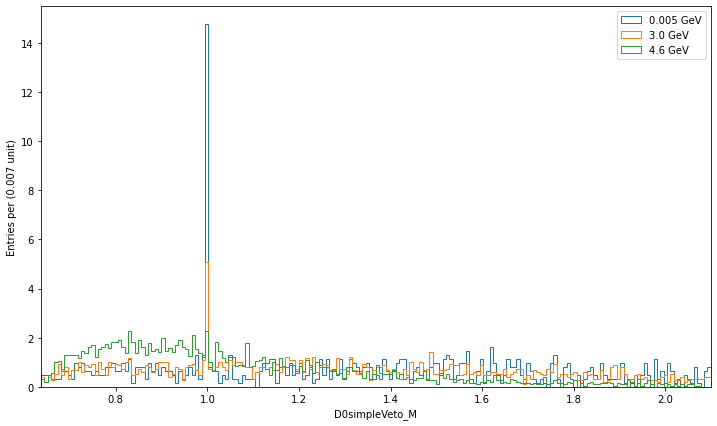

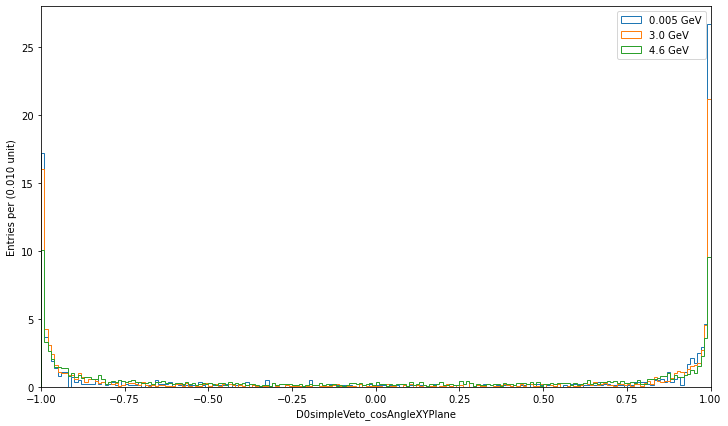

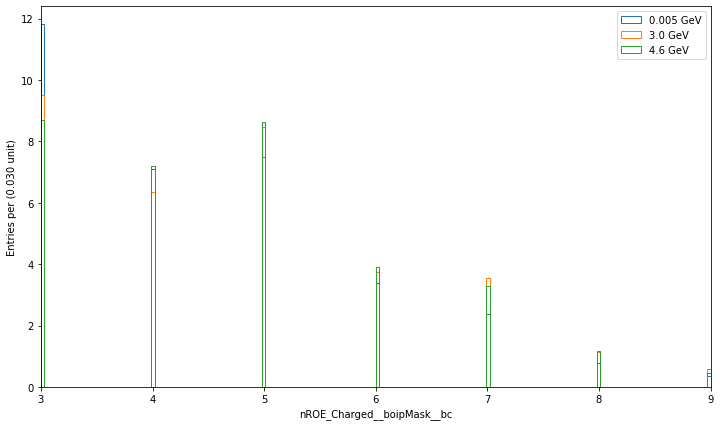

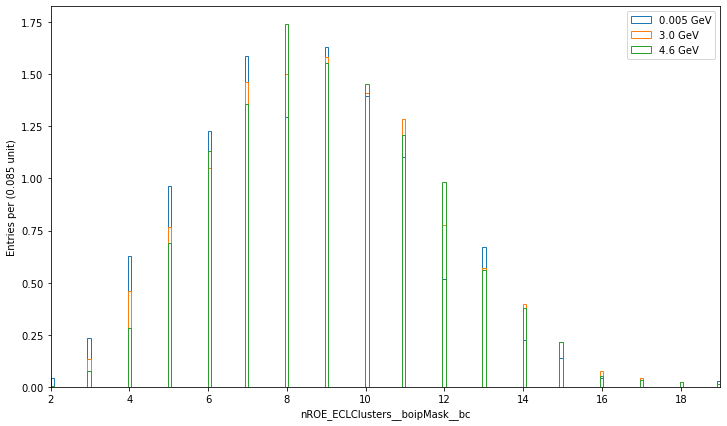

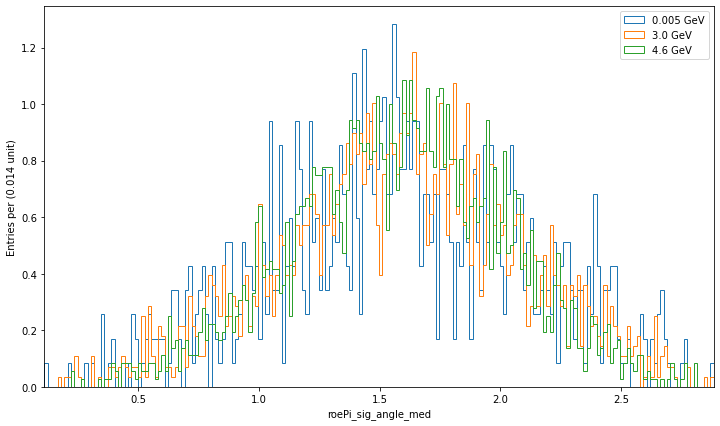

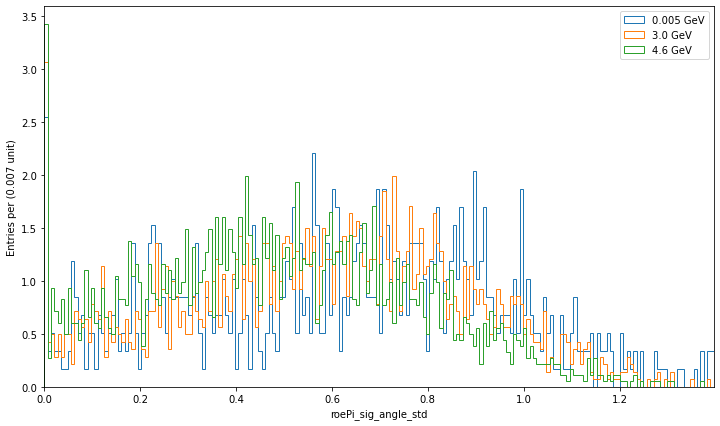

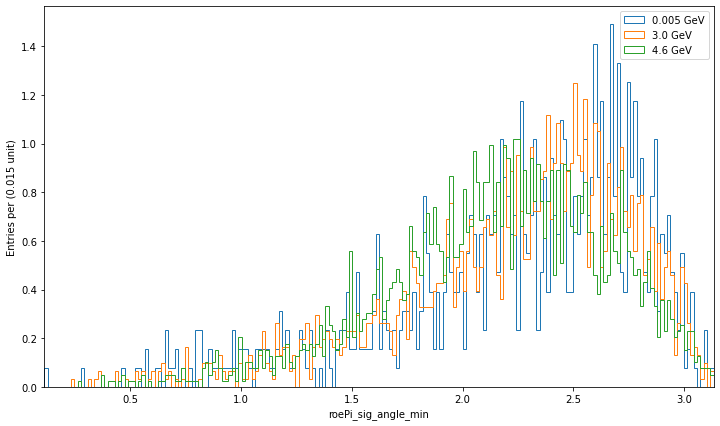

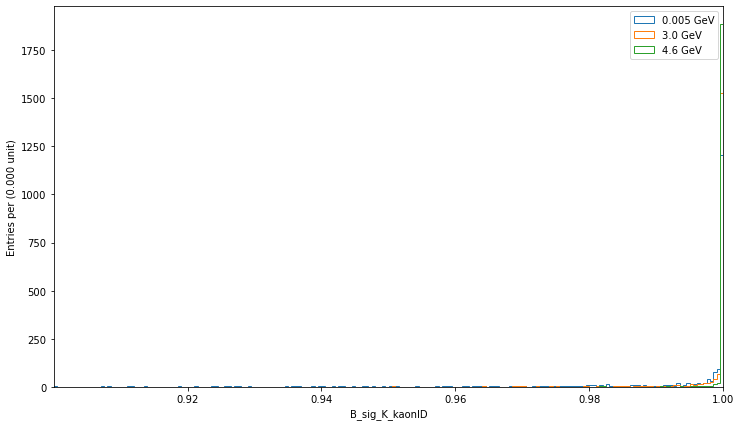

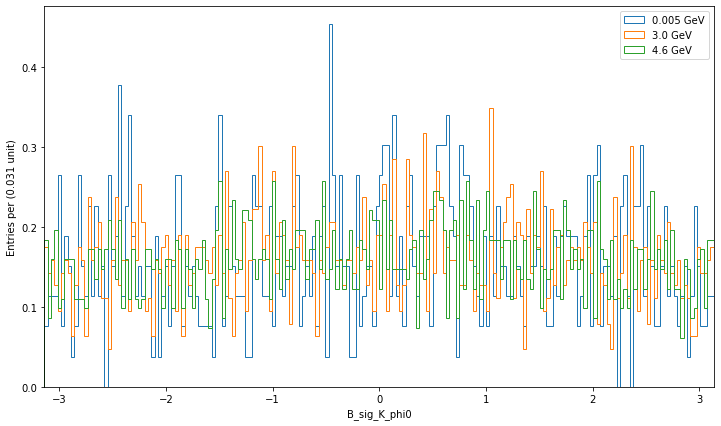

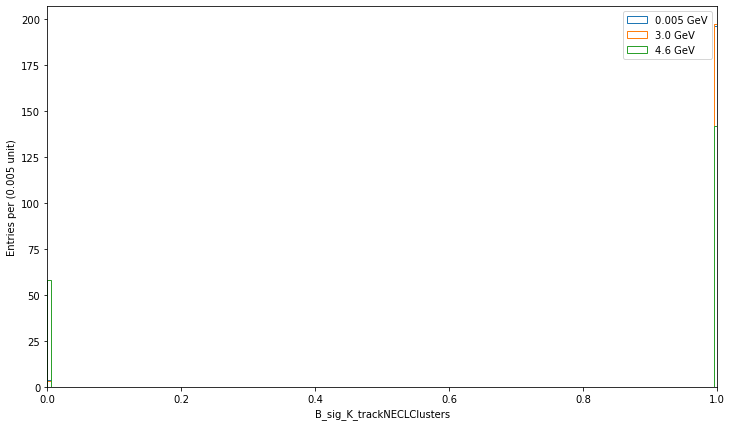

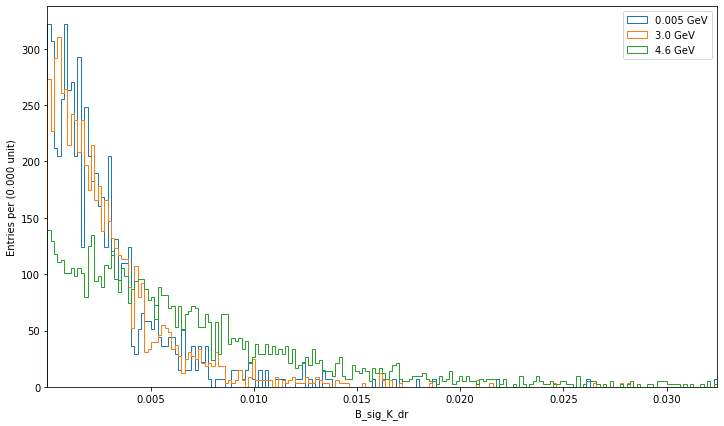

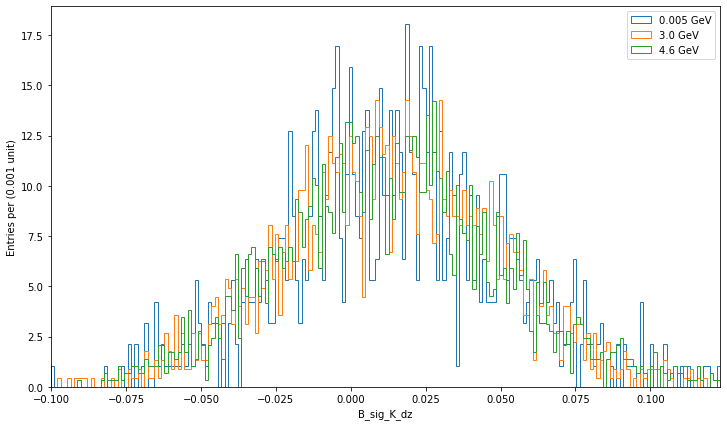

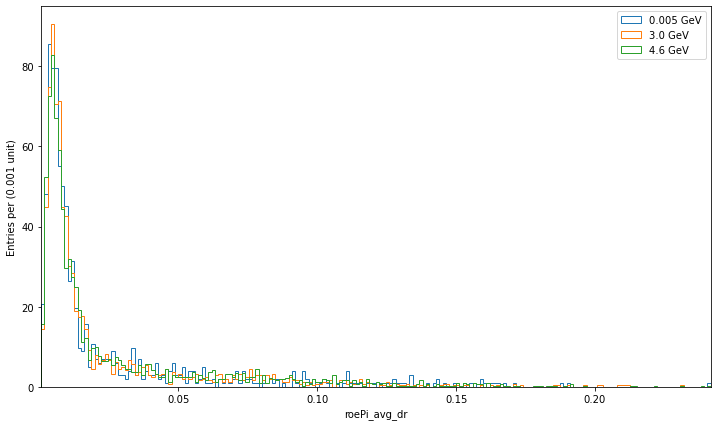

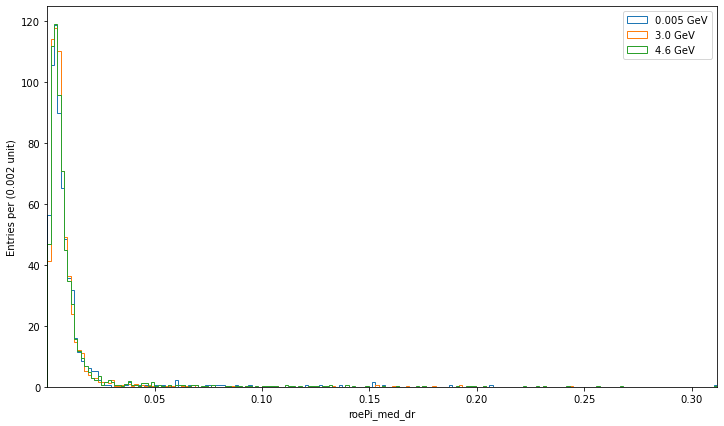

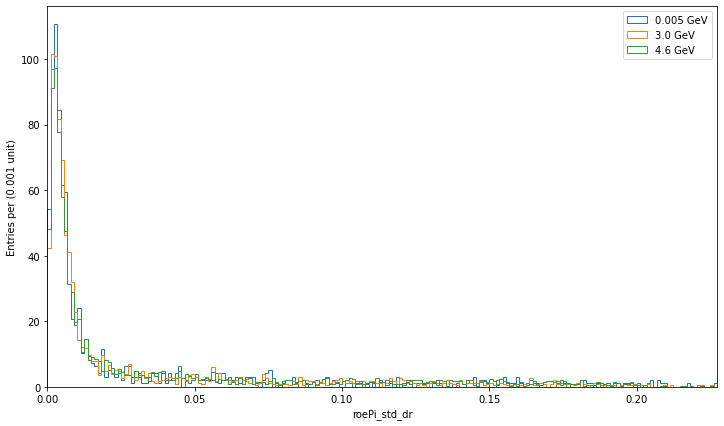

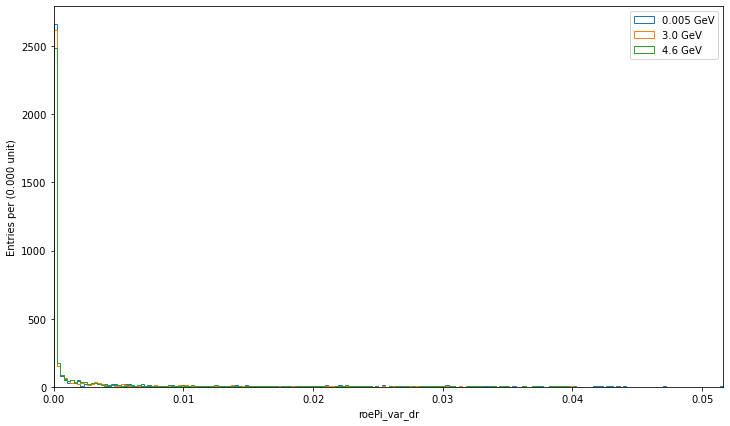

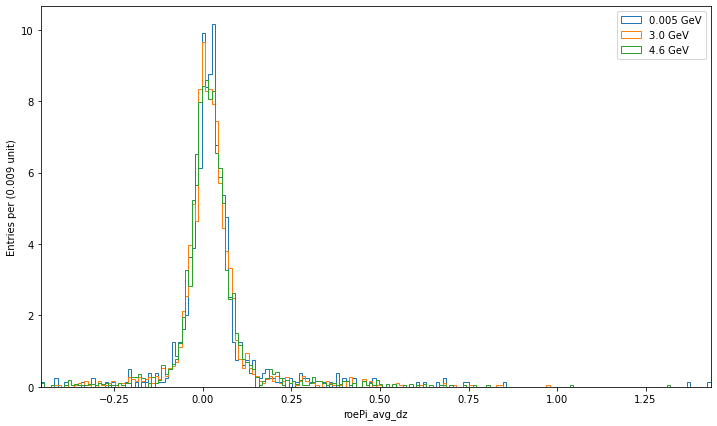

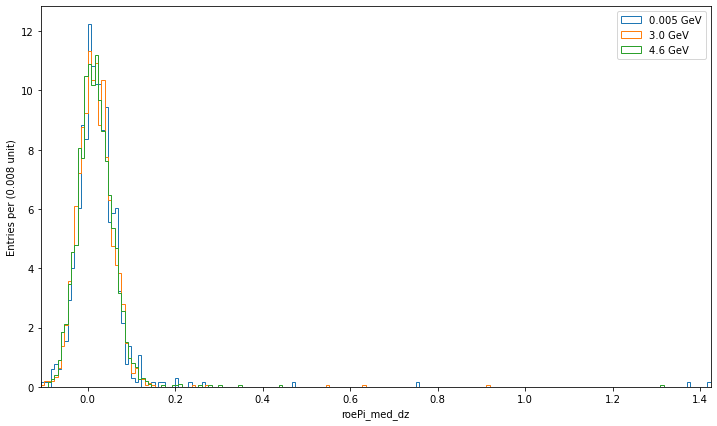

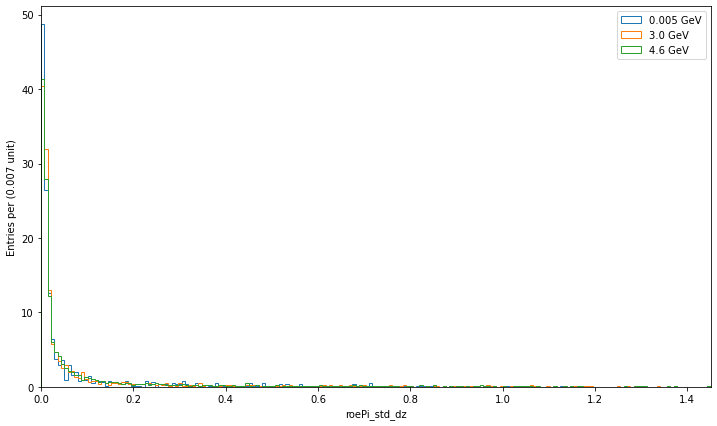

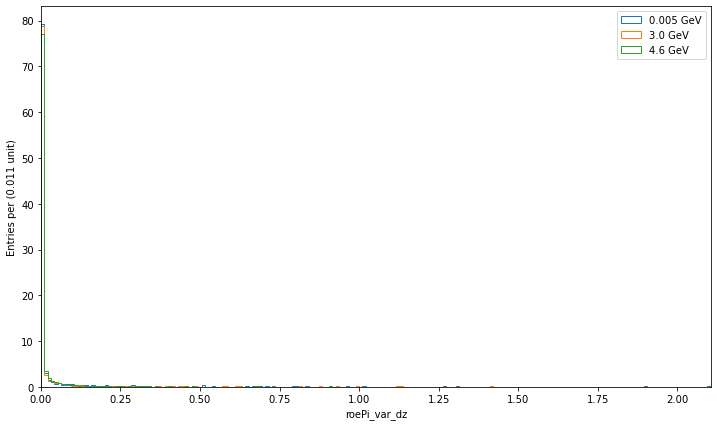

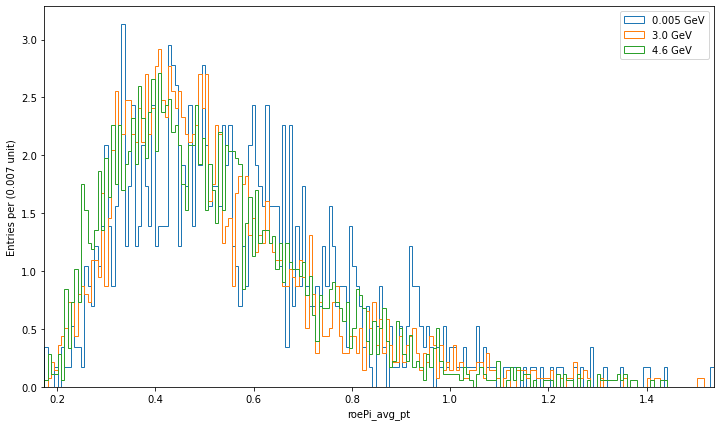

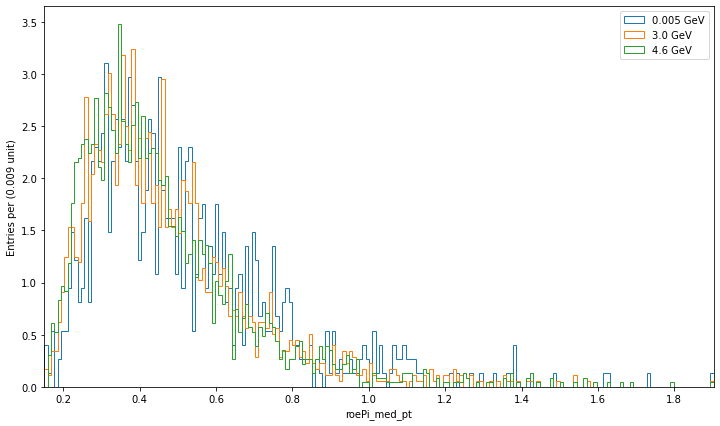

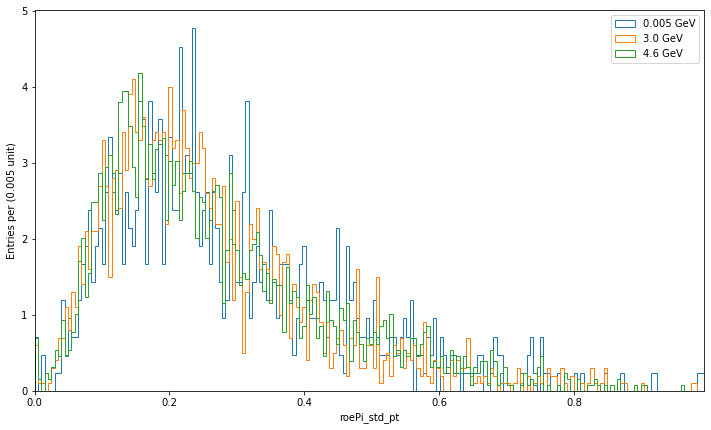

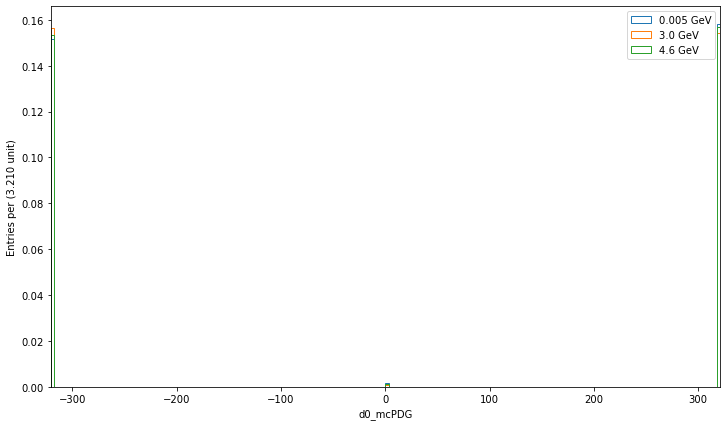

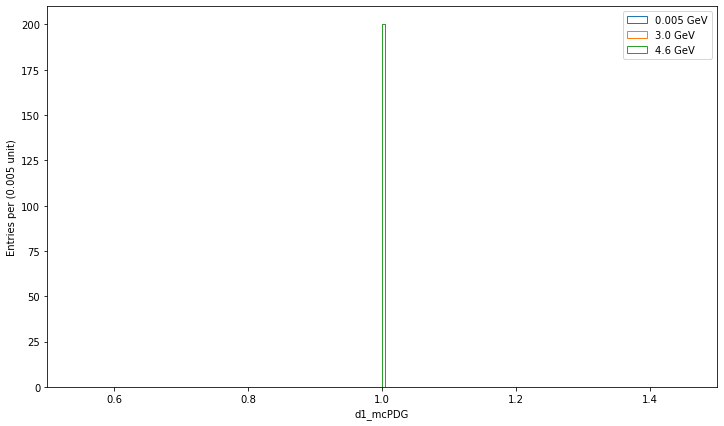

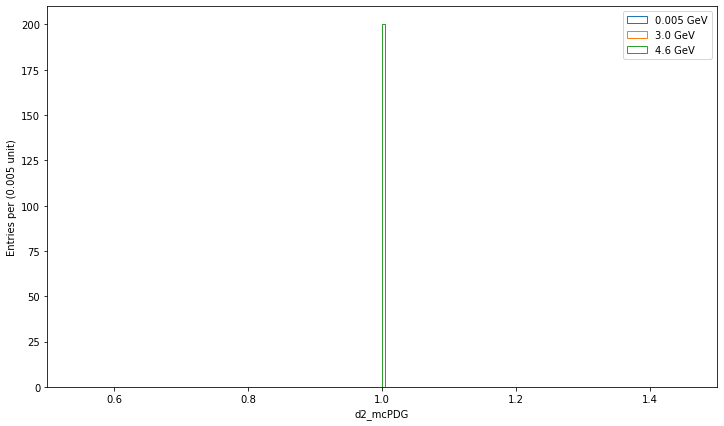

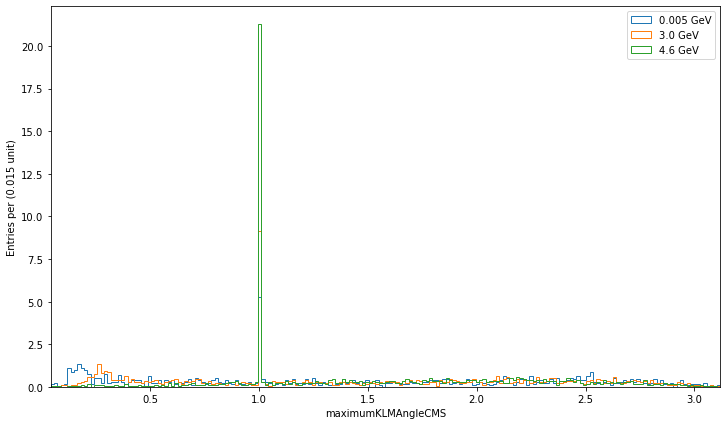

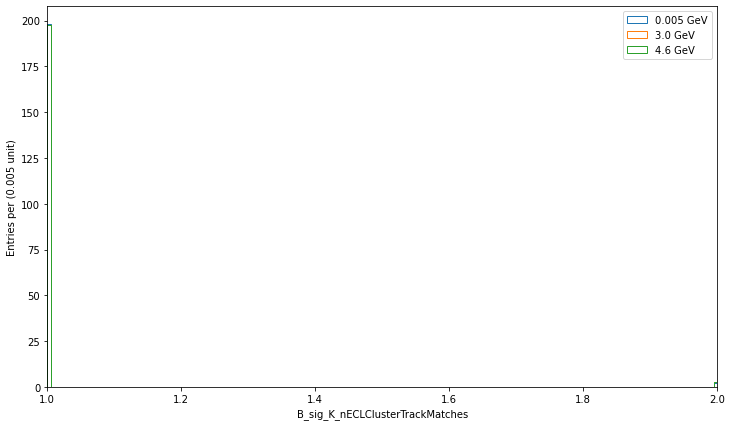

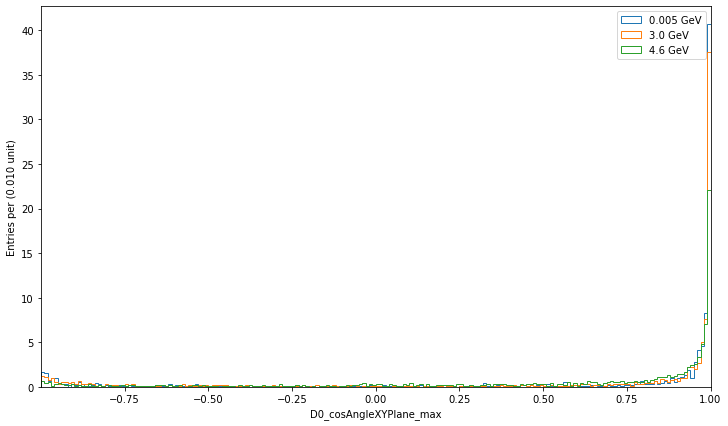

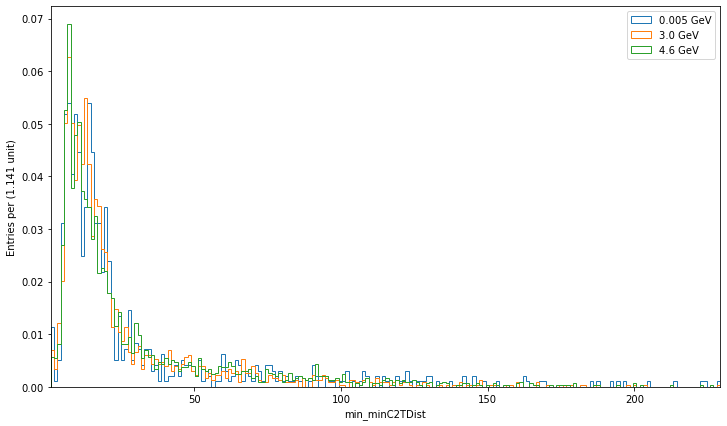

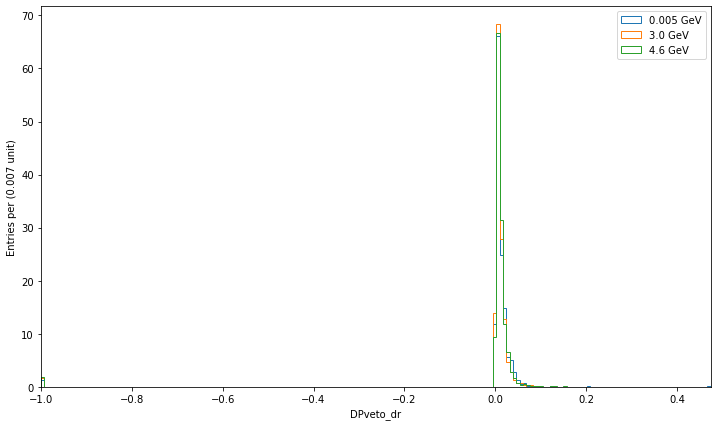

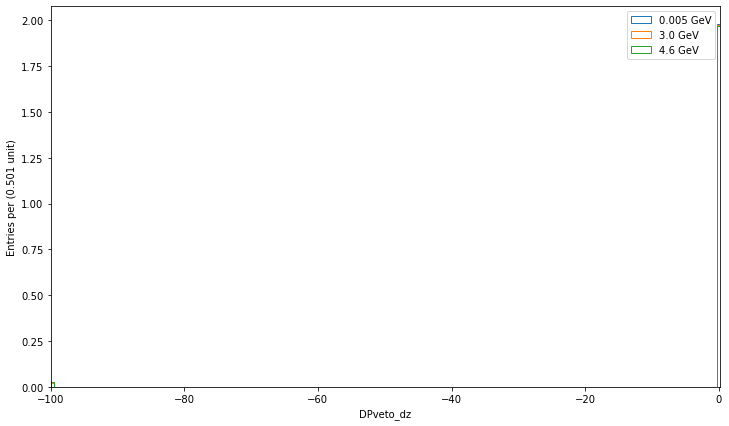

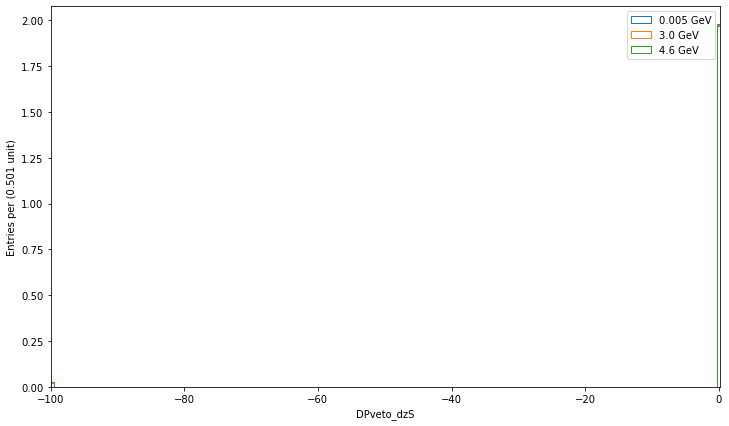

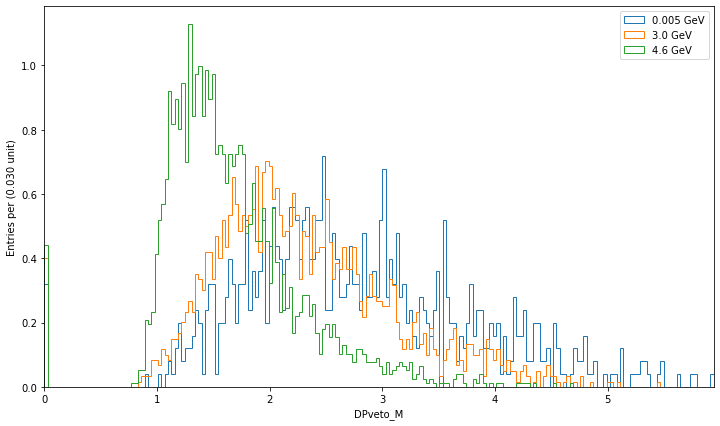

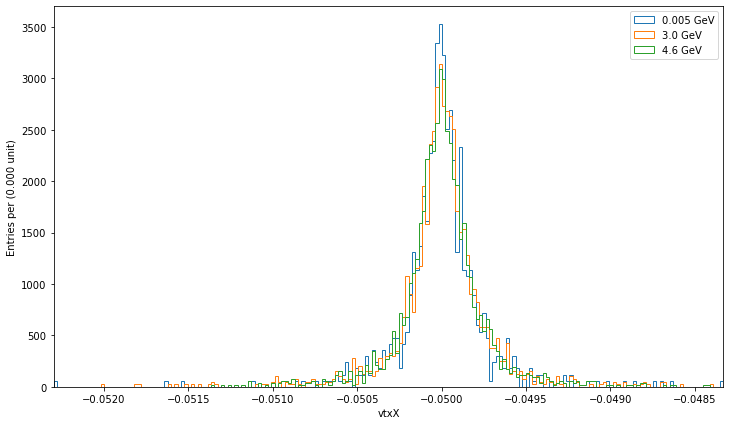

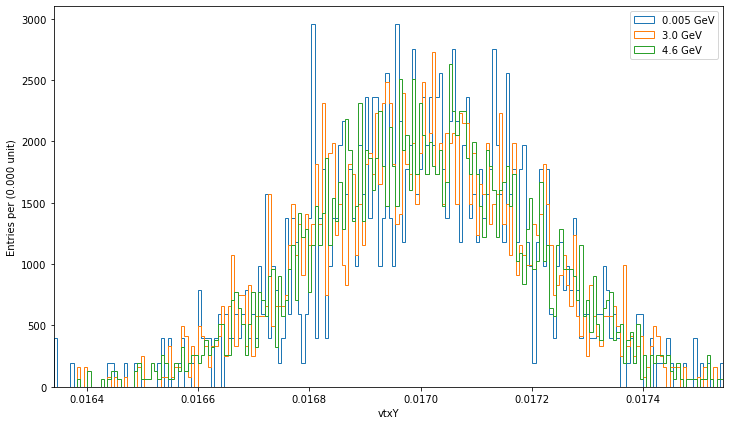

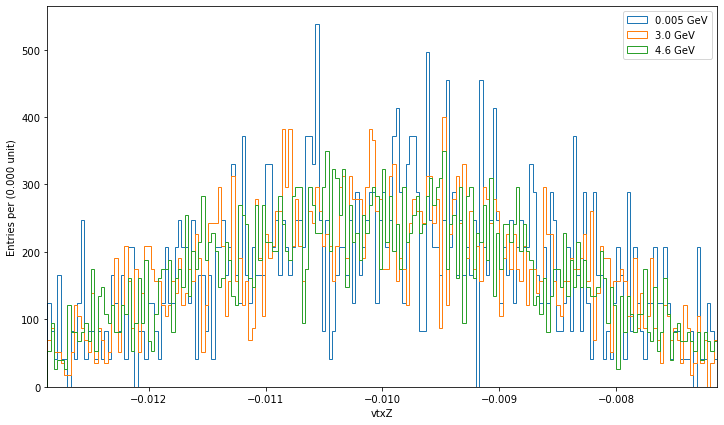

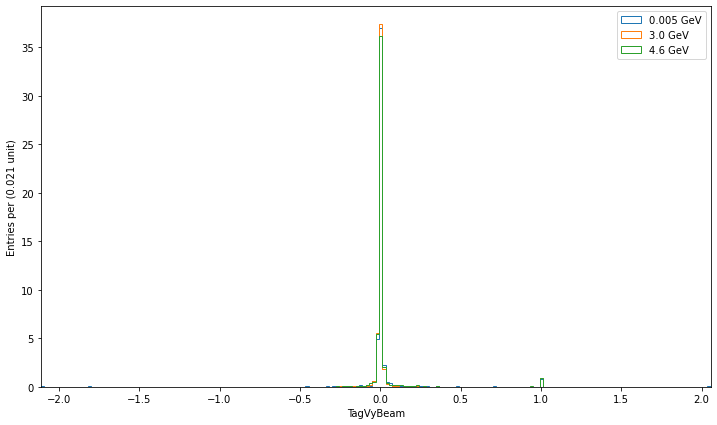

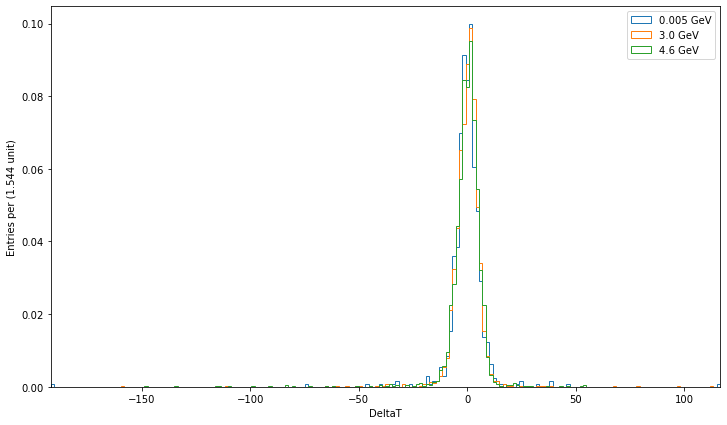

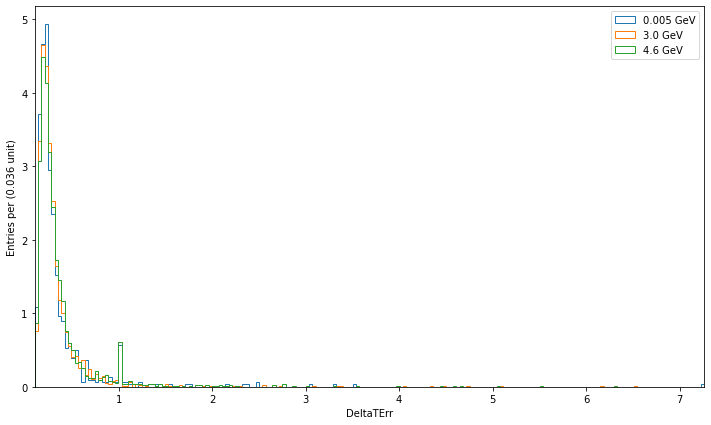

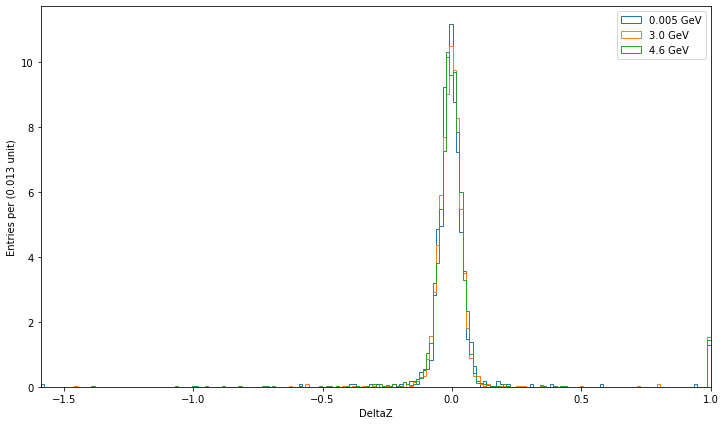

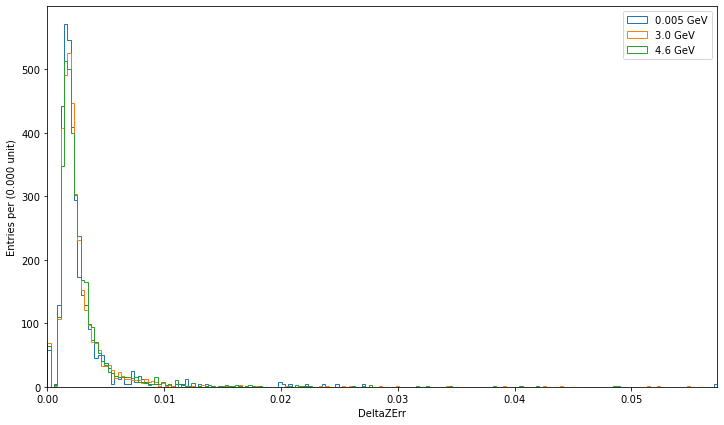

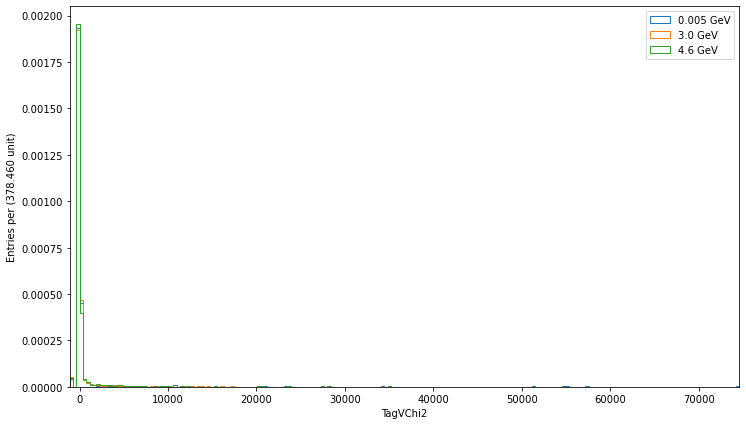

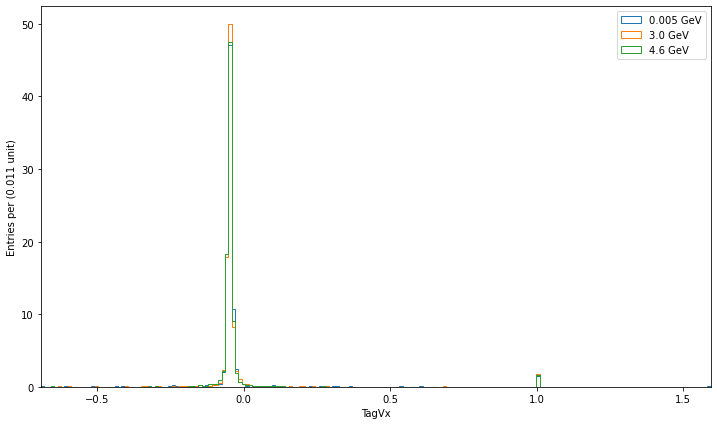

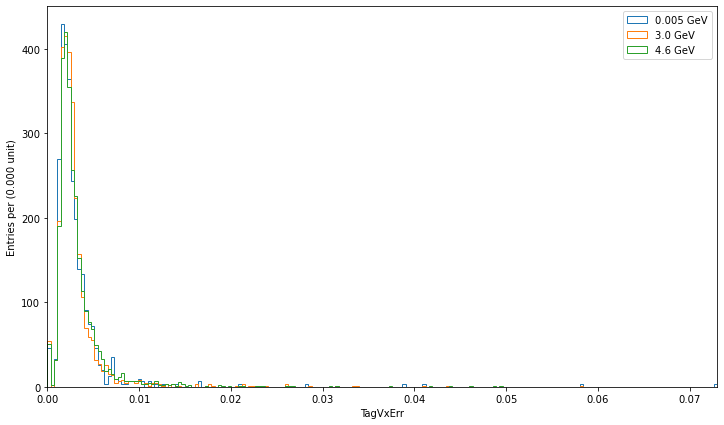

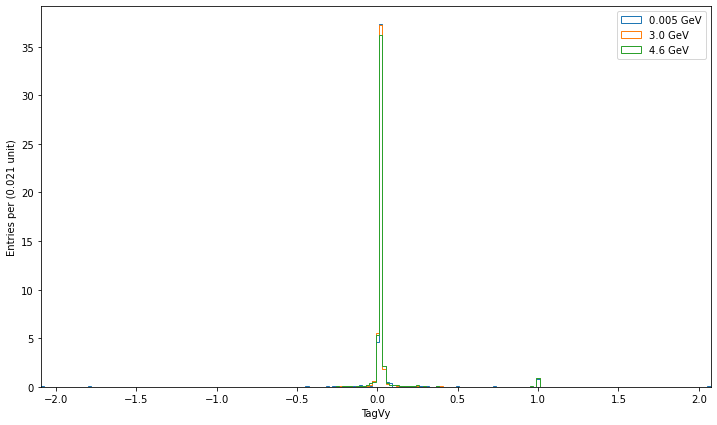

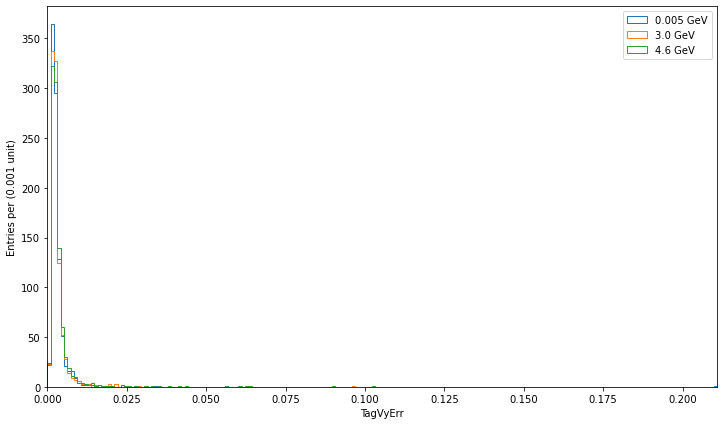

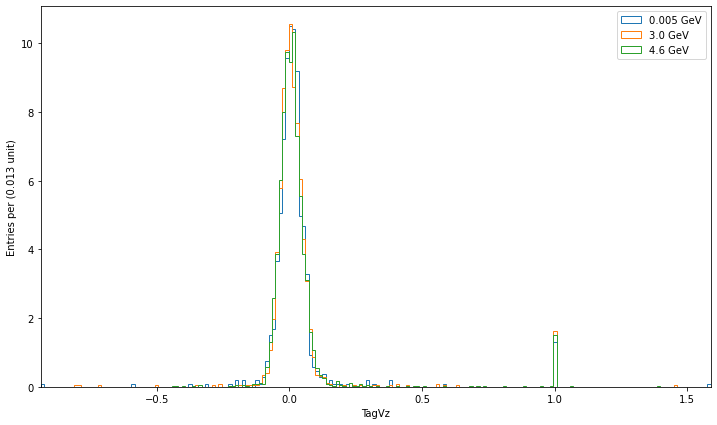

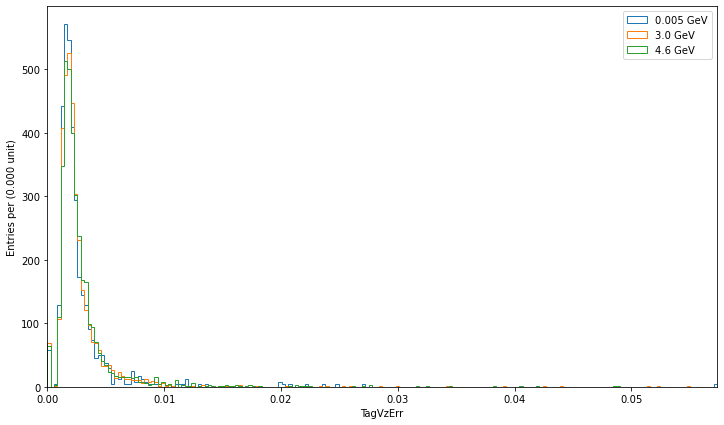

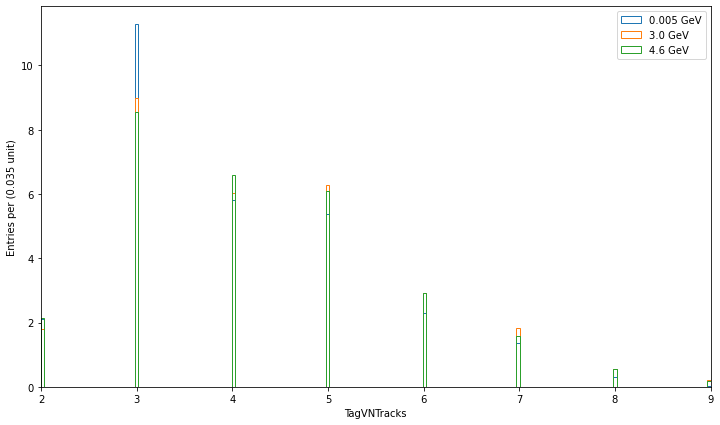

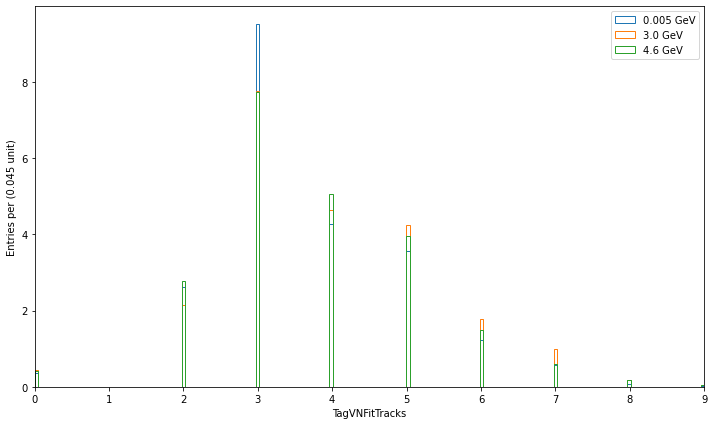

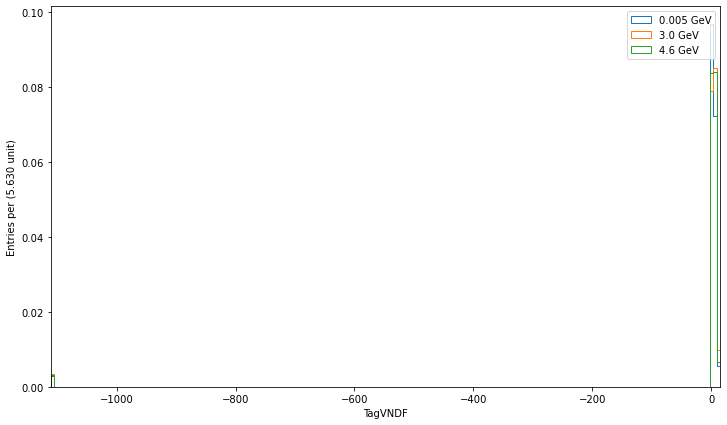

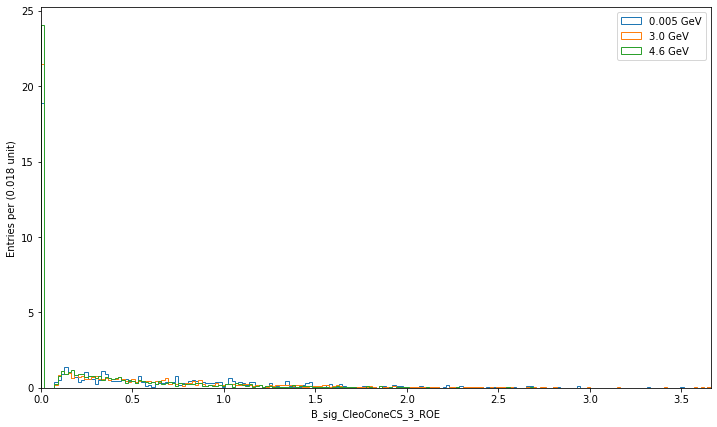

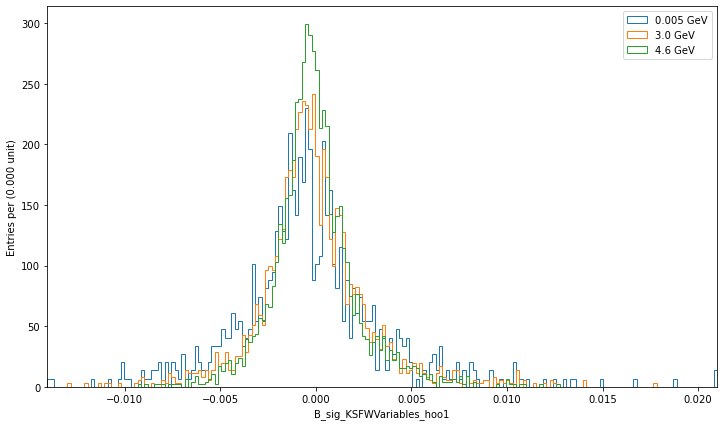

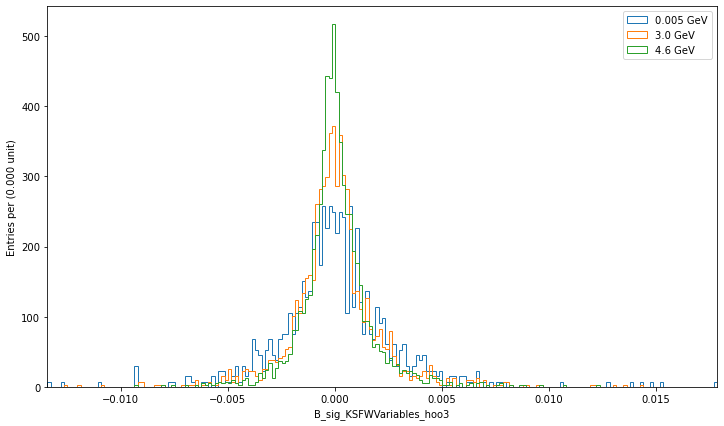

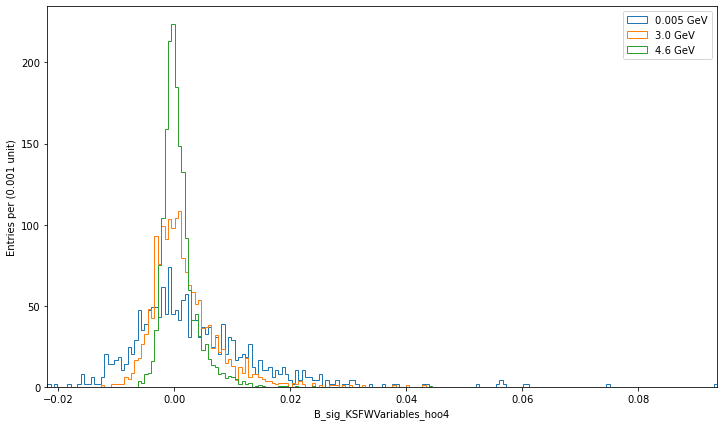

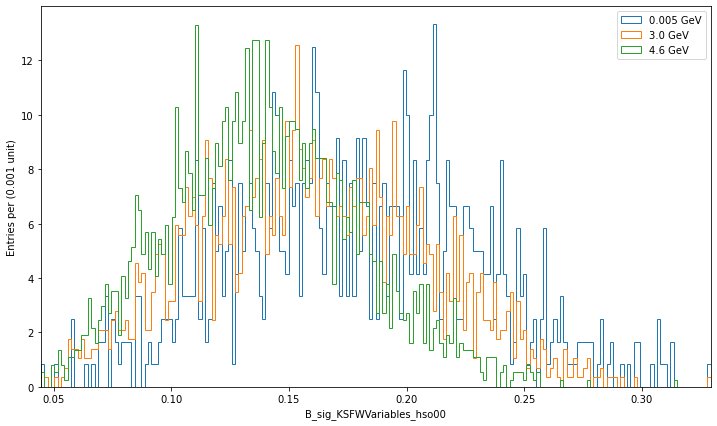

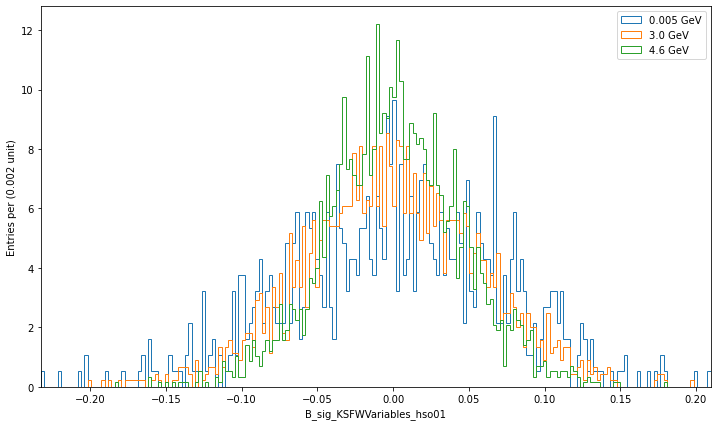

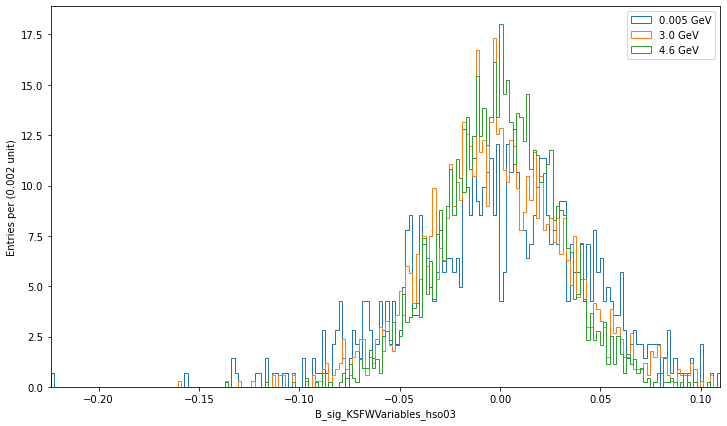

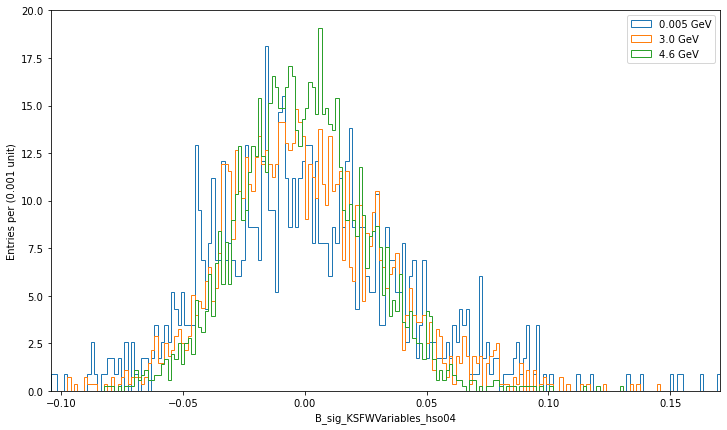

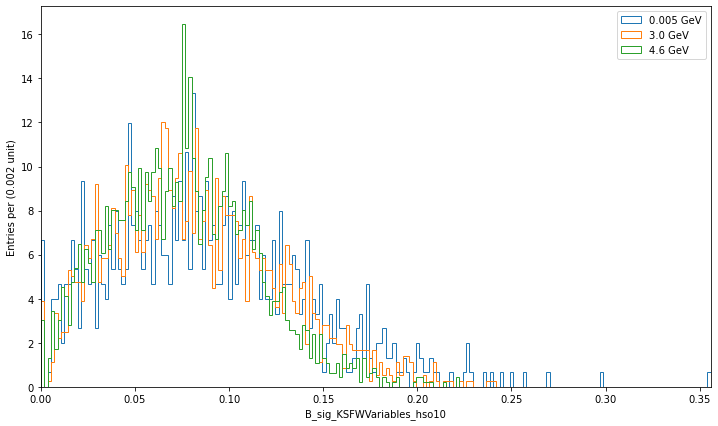

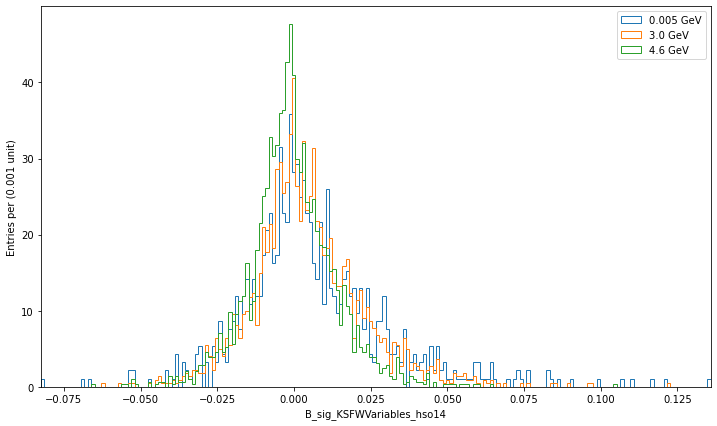

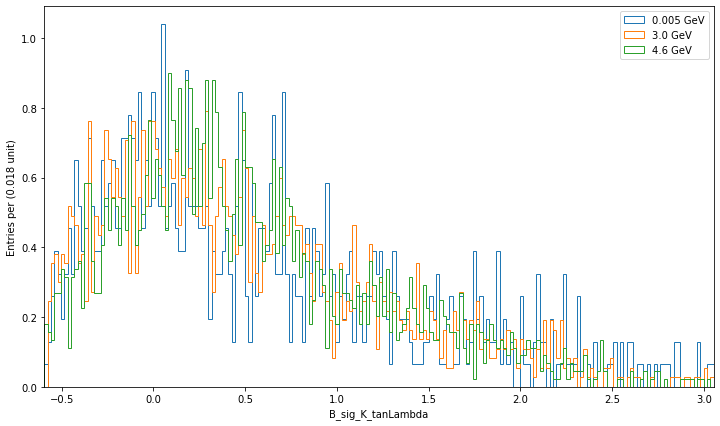

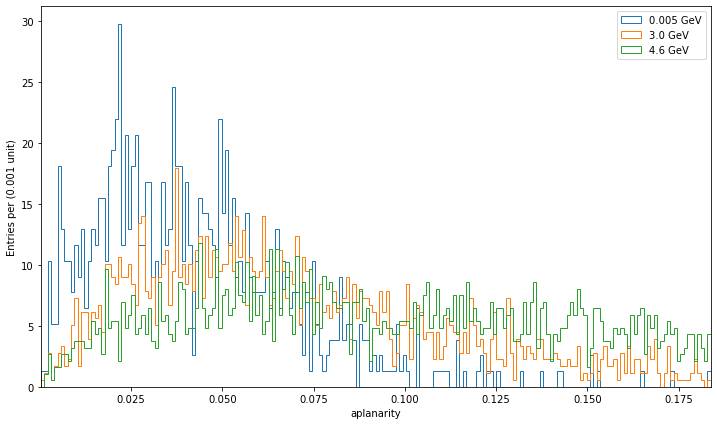

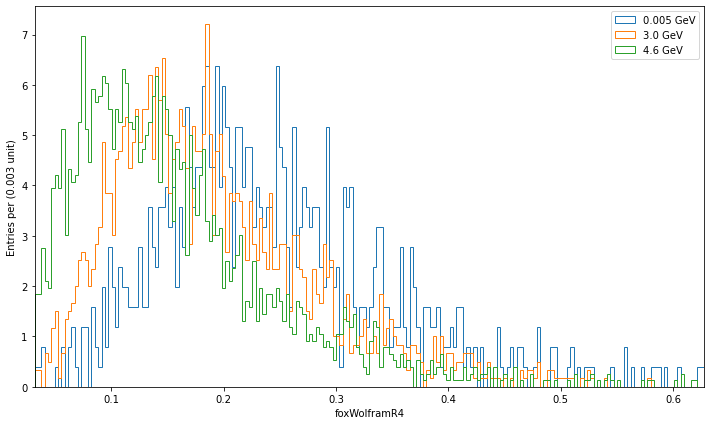

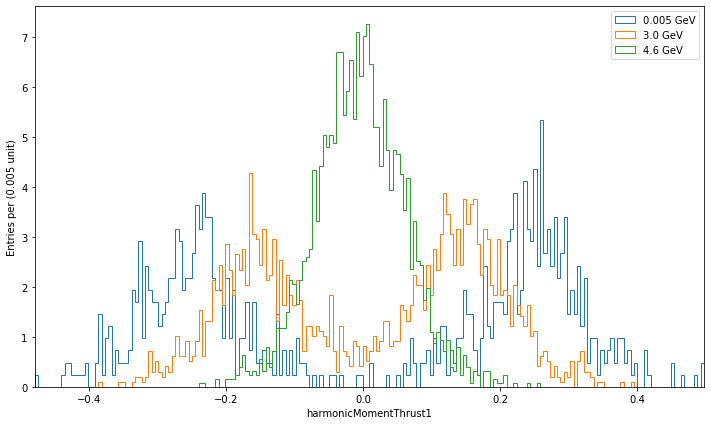

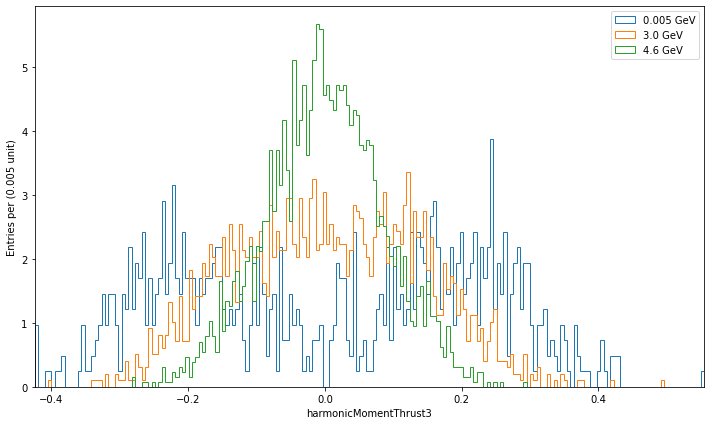

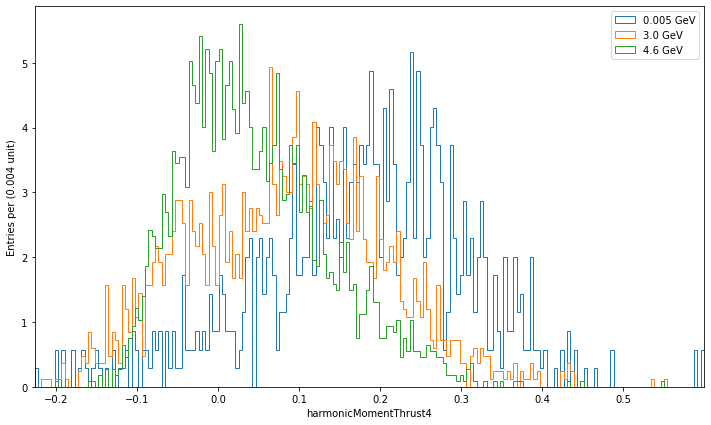

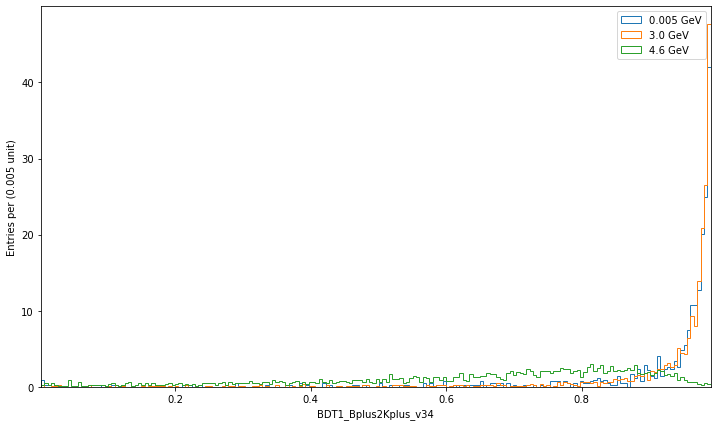

In [59]:
#plot and save

path = "/work/aavocone/week2/Plots/"

for i in filter_0_005.columns:
    plot_hist(filter_0_005, filter_3_0, filter_4_6, i, path)
    plt.savefig(path + i + ".png")